# **0- business understanding**
#### an introduction to why we need to detect credit card fraud

In [59]:
# !pip install pycaret
# !pip install catboost
# !pip install xgboost
# !pip install category_encoders
# !pip install shap

# 1- **Data understanding**
## **1.1 EDA**
let's read the csv file and try to understand our data

### **Importing the necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
palette = "mako"

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv file
df = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

Let's see the shape of the data and see how many rows and columns we have

In [3]:
# show a portion of the dataset (the 5 first rows)
df.head().T

0  \
Unnamed: 0                                            0   
trans_date_trans_time               2019-01-01 00:00:18   
cc_num                                 2703186189652095   
merchant                     fraud_Rippin, Kub and Mann   
category                                       misc_net   
amt                                                4.97   
first                                          Jennifer   
last                                              Banks   
gender                                                F   
street                                   561 Perry Cove   
city                                     Moravian Falls   
state                                                NC   
zip                                               28654   
lat                                             36.0788   
long                                           -81.1781   
city_pop                                           3495   
job                           Psychologist, counselling   
dob                                          1988-03-09   
trans_num              0b242abb623afc578575680df30655b9   
unix_time                                    1325376018   
merch_lat                                     36.011293   
merch_long                                   -82.048315   
is_fraud                                              0   

                                                       1  \
Unnamed: 0                                             1   
trans_date_trans_time                2019-01-01 00:00:44   
cc_num                                      630423337322   
merchant                 fraud_Heller, Gutmann and Zieme   
category                                     grocery_pos   
amt                                               107.23   
first                                          Stephanie   
last                                                Gill   
gender                                                 F   
street                      43039 Riley Greens Suite 393   
city                                              Orient   
state                                                 WA   
zip                                                99160   
lat                                              48.8878   
long                                           -118.2105   
city_pop                                             149   
job                    Special educational needs teacher   
dob                                           1978-06-21   
trans_num               1f76529f8574734946361c461b024d99   
unix_time                                     1325376044   
merch_lat                                      49.159047   
merch_long                                   -118.186462   
is_fraud                                               0   

                                                      2  \
Unnamed: 0                                            2   
trans_date_trans_time               2019-01-01 00:00:51   
cc_num                                   38859492057661   
merchant                           fraud_Lind-Buckridge   
category                                  entertainment   
amt                                              220.11   
first                                            Edward   
last                                            Sanchez   
gender                                                M   
street                         594 White Dale Suite 530   
city                                         Malad City   
state                                                ID   
zip                                               83252   
lat                                             42.1808   
long                                           -112.262   
city_pop                                           4154   
job                         Nature conservation officer   
dob                                          1962-01-19   
trans_num              a1a22d70485983eac12b5b88dad1cf95   
unix_time       

In [4]:
df.shape

(1296675, 23)

In [5]:
df.dtypes.value_counts()

object     12
int64       6
float64     5
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

We can notice that these columns vary over a wide range of data, so perhaps the use of scaling "normalisation min-max" would be beneficial, to get the data vary between [0, 1], so it will be easier for the machine learning algorithms to train.

### Let's check the target 'is_fraud'

In [8]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

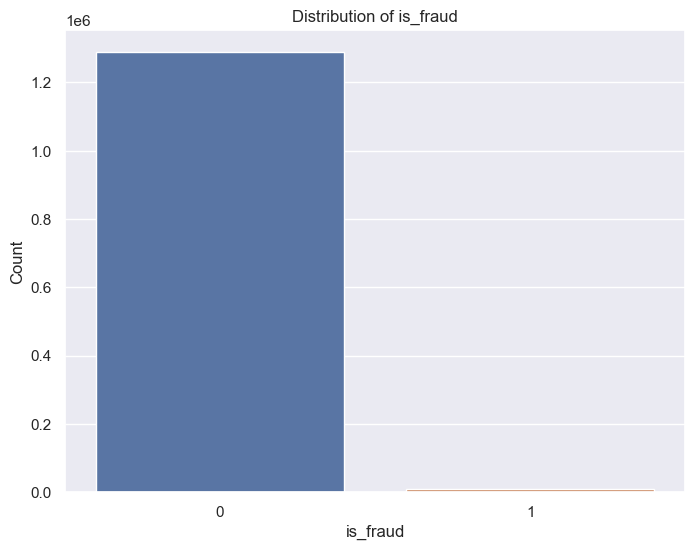

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

## **Features Exploration**

Let's try to understand the columns of our dataset, and try to deduce what we are working with!!

### **Unnamed: 0**

In [10]:
unamed = df['Unnamed: 0'].nunique()
unamed_len = len(df['Unnamed: 0'])
print(f"{unamed = } / {unamed_len = }")

unamed = 1296675 / unamed_len = 1296675


We can see that all the values of this column are unique, so it may be an id but generally, columns with unique values have no impact on the target variable, so it's best to consider removing it.

## **trans_date_trans_time:**

This column represents the date and time of each transaction made, we can extract some useful information, like the hour, day, month and year of each transaction.

## **cc_num:**

Contains the credit card numbers used in  every transaction.

We need to change the type of the cc_num from int -> category, since the cc_num should be an identifier for the user credit card, and some machine learning algorithms can treat them as numbers, not as objects.

In [11]:
n_cc_num = df['cc_num'].nunique()
cc_num_len = len(df['cc_num'])
print(f"unique values in cc_num are: {n_cc_num}/{cc_num_len}")

unique values in cc_num are: 983/1296675


This means that this column may be useful, so we will keep it and verify this using the correlation matrix.

## **merchant:**

Refers to the name or identifier of the merchant or establishment where the credit card transaction took place. It represents the business or organization that processed the transaction.

In [12]:
n_merchant = df['merchant'].nunique()
merchant_len = len(df['merchant'])
print(f"unique values in merchant are: {n_merchant}/{merchant_len}")

unique values in merchant are: 693/1296675


## **category:**
Represents the category of the business where the transaction took place.

In [13]:
n_category = df['category'].nunique()
category_len = len(df['category'])
print(f"unique values in category are: {n_category}/{category_len}")

unique values in category are: 14/1296675


## **amt:**
I don't know what this column does?

In [14]:
n_amt = df['amt'].nunique()
amt_len = len(df['amt'])
print(f"unique values in amt are: {n_amt}/{amt_len}")

unique values in amt are: 52928/1296675


## **first and last:**

These are the first and last names on the credit card holder. They will probably be deleted because the names on the credit card shouldn't have any effect on the target feature.

## **gender:**

This column naturally specifies which gender is the user with the transaction. 

## **street | city | state | zip**

We need to analyse the correlation matrix to see if these three have any correlation between them, if yes then we check for the columns with the higher correlation with the target "is_fraud", then we choose it and eliminate the other columns.

## **lat | long:**

**Latitude:** is a measure of a location's distance north or south of the Earth's equator. It is expressed in degrees and ranges from 0° at the equator to 90°.

**Longitude:** is a measure of a location's distance east or west of the prime meridian, which passes through Greenwich, London, UK.

## **city_pop:**

"city_pop" likely refers to the population of a city. It is a term used to indicate the number of people living within the boundaries of a particular city.

## **job:**
The job of the cart holder!

## **dob:**
The date of birth. It's an object we need to convert to a datetime.

We can also extract the age of the user at the time of the transaction.

## **trans_num:**

id for the transition made, it's unique and we are probably going to remove it.

In [15]:
n_trans_num = df['trans_num'].nunique()
trans_num_len = len(df['trans_num'])
print(f"unique values in category are: {n_trans_num}/{trans_num_len}")

unique values in category are: 1296675/1296675


## **unix_time:**

Unix time, also known as POSIX time or epoch time, is a system for representing dates and times as a single numerical value. It is defined as the number of seconds that have elapsed since January 1, 1970, at 00:00:00 Coordinated Universal Time (UTC).

## **merch_lat | merch_long:**

The longitude and latitude of the merchant.

Now we have an idea about our dataset, let's continue to the next step.

# **2- Data Preparation**

### **Data Pre-Processing**
let's start by removing useless columns.

As we already saw from our previous analysis:

    . Unnamed: 0: an id

    . first: first name

    . last: last name

    . trans_num: id of a transition
    
    . unix_time: the time in seconds of that transaction

 we will remove these columns

In [16]:
# drop unnecessary columns

df = df.drop(['Unnamed: 0', 'first', 'last', 'trans_num', 'unix_time'], axis=1)
test = test.drop(['Unnamed: 0', 'first', 'last', 'trans_num', 'unix_time'], axis=1)

Correcting the type of trans_date_trans_time, dob and cc_num. and also extracting some new columns from them.

In [17]:
# convert the type to datetime

df["trans_date_trans_time"] = pd.to_datetime(df.trans_date_trans_time)
test["trans_date_trans_time"] = pd.to_datetime(test.trans_date_trans_time)

In [18]:
# extract a new column that contains the hour when each transaction is made.

import datetime

df['hour'] = df.trans_date_trans_time.dt.hour
test['hour'] = test.trans_date_trans_time.dt.hour

In [19]:
# change format to 'yyyy-mm-dd'

df['trans_date'] = df['trans_date_trans_time'].dt.strftime('%Y/%m/%d')
df['trans_date'] = pd.to_datetime(df.trans_date)

test['trans_date'] = test['trans_date_trans_time'].dt.strftime('%Y/%m/%d')
test['trans_date'] = pd.to_datetime(test.trans_date)

In [20]:
df[["trans_date", "hour"]]

trans_date  hour
0       2019-01-01     0
1       2019-01-01     0
2       2019-01-01     0
3       2019-01-01     0
4       2019-01-01     0
...            ...   ...
1296670 2020-06-21    12
1296671 2020-06-21    12
1296672 2020-06-21    12
1296673 2020-06-21    12
1296674 2020-06-21    12

[1296675 rows x 2 columns]

In [21]:
# drop the trans_date_trans_time as we no longer need it

df = df.drop('trans_date_trans_time', axis=1)
test = test.drop('trans_date_trans_time', axis=1)

In [22]:
# change the type of cc_num.
df['cc_num']= df.cc_num.astype('category')
test['cc_num']= test.cc_num.astype('category')

In [23]:
# change the type of dob
df['dob'] = pd.to_datetime(df.dob)
test['dob'] = pd.to_datetime(test.dob)

In [24]:
# extract new column that contains the user age when the transaction was made from dob.
df['age_at_transaction'] = ((df['trans_date'] - df['dob']).dt.days / 365.25).astype(int)
test['age_at_transaction'] = ((test['trans_date'] - test['dob']).dt.days / 365.25).astype(int)

print(df[['trans_date', 'dob', 'age_at_transaction']])

df = df.drop('dob', axis=1)
test = test.drop('dob', axis=1)

        trans_date        dob  age_at_transaction
0       2019-01-01 1988-03-09                  30
1       2019-01-01 1978-06-21                  40
2       2019-01-01 1962-01-19                  56
3       2019-01-01 1967-01-12                  51
4       2019-01-01 1986-03-28                  32
...            ...        ...                 ...
1296670 2020-06-21 1961-11-24                  58
1296671 2020-06-21 1979-12-11                  40
1296672 2020-06-21 1967-08-30                  52
1296673 2020-06-21 1980-08-18                  39
1296674 2020-06-21 1995-08-16                  24

[1296675 rows x 3 columns]


### **Cheking for Missing Values**

In [25]:
df.isnull().sum()

cc_num                0
merchant              0
category              0
amt                   0
gender                0
street                0
city                  0
state                 0
zip                   0
lat                   0
long                  0
city_pop              0
job                   0
merch_lat             0
merch_long            0
is_fraud              0
hour                  0
trans_date            0
age_at_transaction    0
dtype: int64

### **Checking for Duplicates**

In [26]:
n_duplicates = df.duplicated().sum()
print(f"The number of duplicates in our dataset is: {n_duplicates}")

The number of duplicates in our dataset is: 0


Our dataset has no duplicates or missing values, we can proceed and handle outliers.

In this step im going to use the IQR method to detect and remove outliers.

In [27]:
# visualise a boxplot for each column
def visual_outliers(data, numeric_columns):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in numeric_columns:
        i += 1
        plt.subplot(9, 4, i)
        sns.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()

# remove outliers
def remove_outliers(df, columns):
    cleaned_df = df.copy()

    for column in columns:
        if column in cleaned_df.columns:
            Q1 = cleaned_df[column].quantile(0.25)
            Q3 = cleaned_df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

Let's count the number of outliers in each numerical column

In [28]:
# lets get the numerical columns
numerical_columns_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
numerical_columns = list(numerical_columns_df.columns)
numerical_columns.remove('is_fraud')

In [29]:
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that are outliers: {}%'.format(outlier_percent))

for col in numerical_columns:
    outlier_count(col, df)

---------------amt---------------
Number of outliers: 67290
Percent of data that are outliers: 5.19%
---------------zip---------------
Number of outliers: 0
Percent of data that are outliers: 0.0%
---------------lat---------------
Number of outliers: 4679
Percent of data that are outliers: 0.36%
---------------long---------------
Number of outliers: 49922
Percent of data that are outliers: 3.85%
---------------city_pop---------------
Number of outliers: 242674
Percent of data that are outliers: 18.72%
---------------merch_lat---------------
Number of outliers: 4967
Percent of data that are outliers: 0.38%
---------------merch_long---------------
Number of outliers: 41994
Percent of data that are outliers: 3.24%
---------------hour---------------
Number of outliers: 0
Percent of data that are outliers: 0.0%
---------------age_at_transaction---------------
Number of outliers: 236
Percent of data that are outliers: 0.02%


Let's visualise the boxplot of each column.

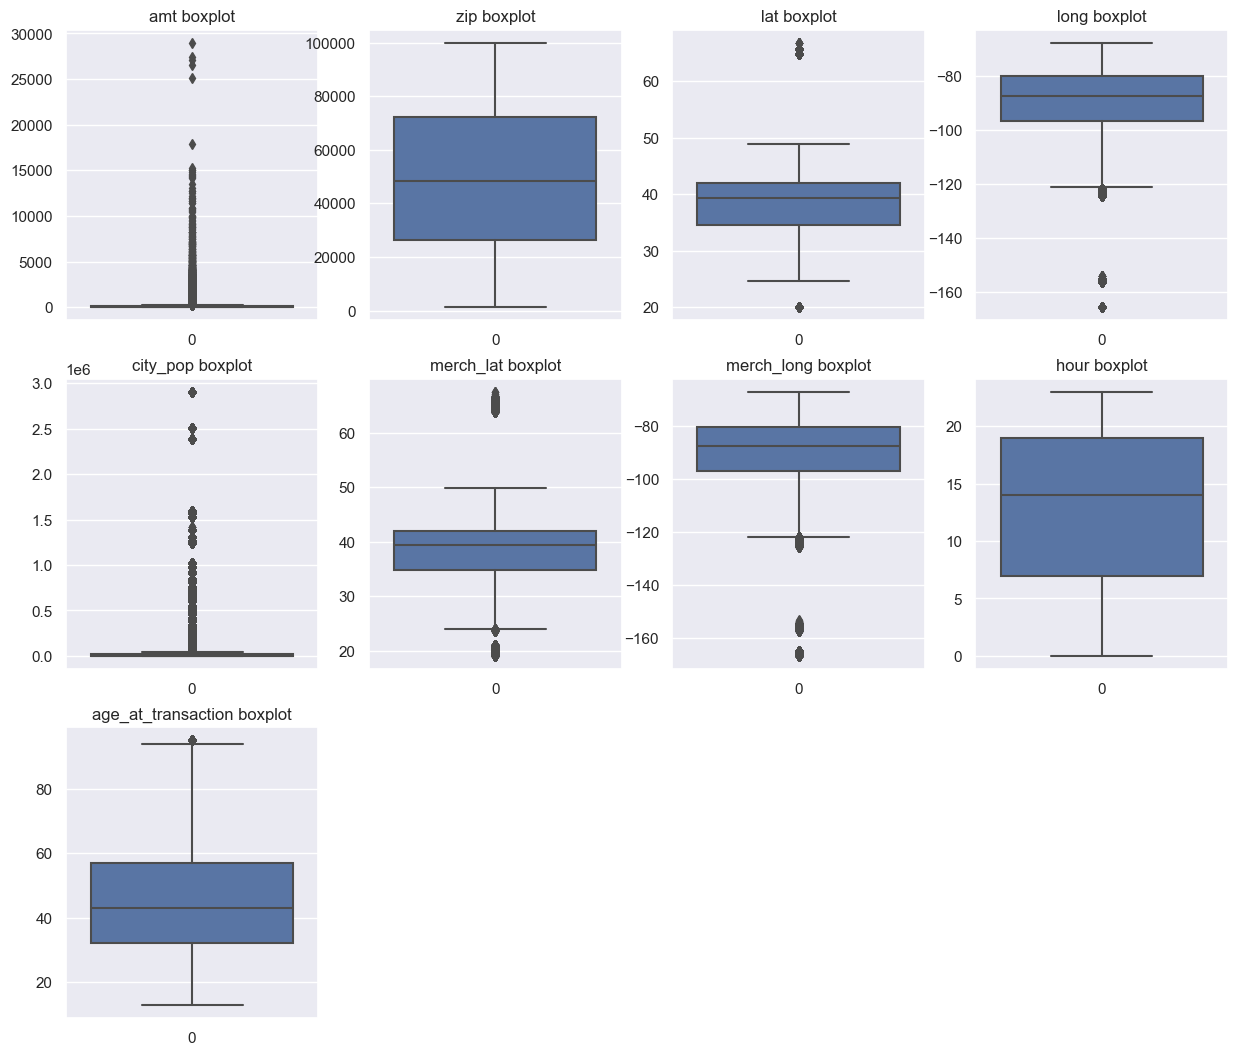

In [30]:
visual_outliers(df, numerical_columns)

We can notice a really high number of outliers in the columns 'amt' and 'city_pop'.

Let's remove the outliers and visualise the boxplots again.

In [31]:
clean_df = remove_outliers(df, numerical_columns)

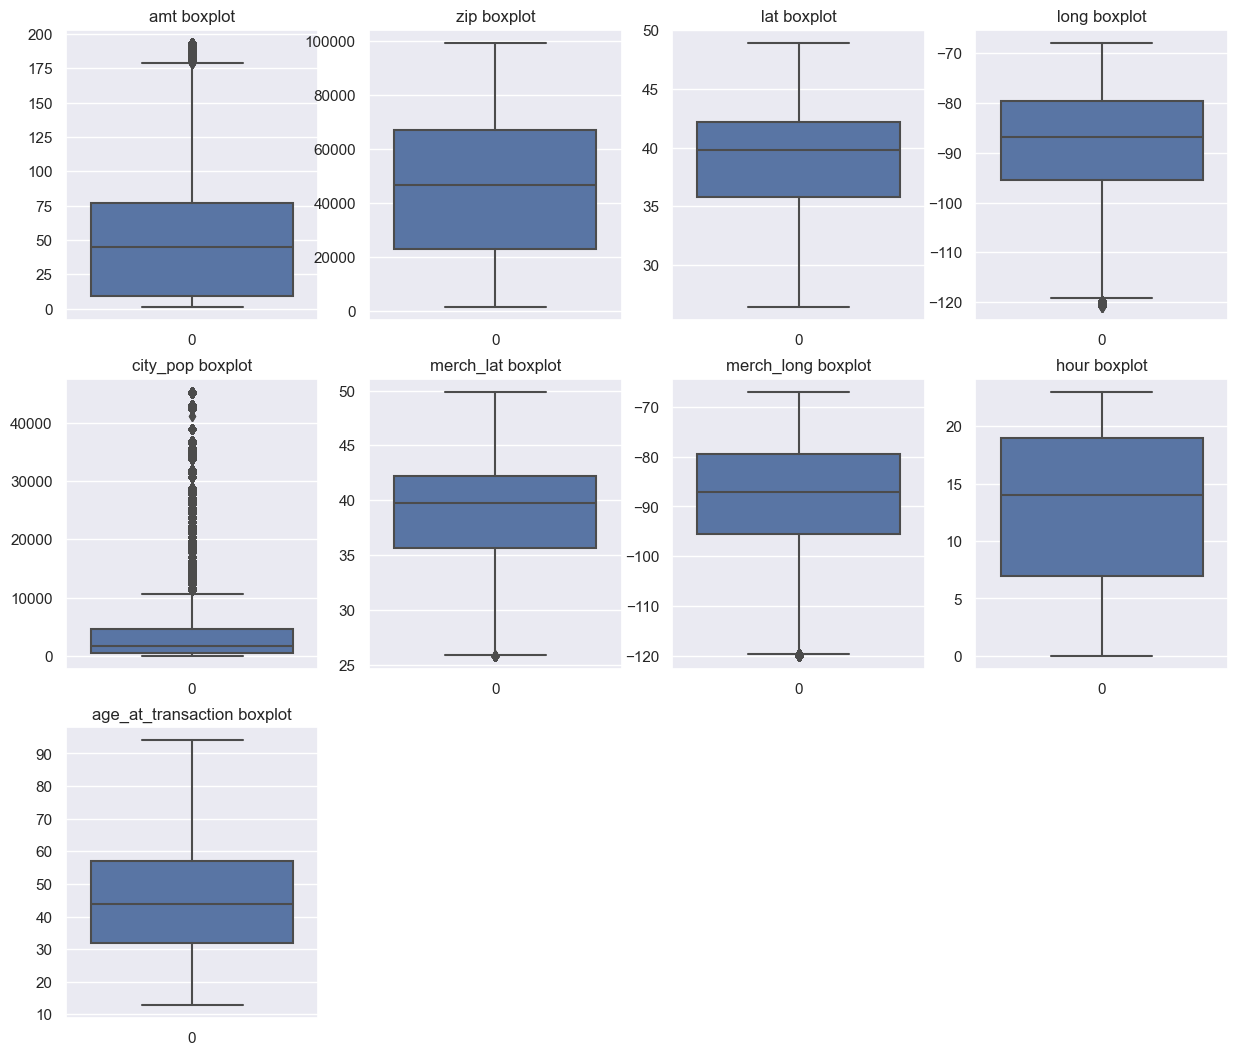

In [32]:
visual_outliers(clean_df, numerical_columns)

Checking the distribution of the target variable 'is_fraud' after removing the outliers.

In [33]:
clean_df['is_fraud'].value_counts()

0    947612
1      1390
Name: is_fraud, dtype: int64

Removing outliers made us lose a large number of observations of the minority class, since we already have an imbalanced dataset.

In this case, it's better to not remove the outliers.

Let's check the correlation between the variables and the target.

### **Correlation**

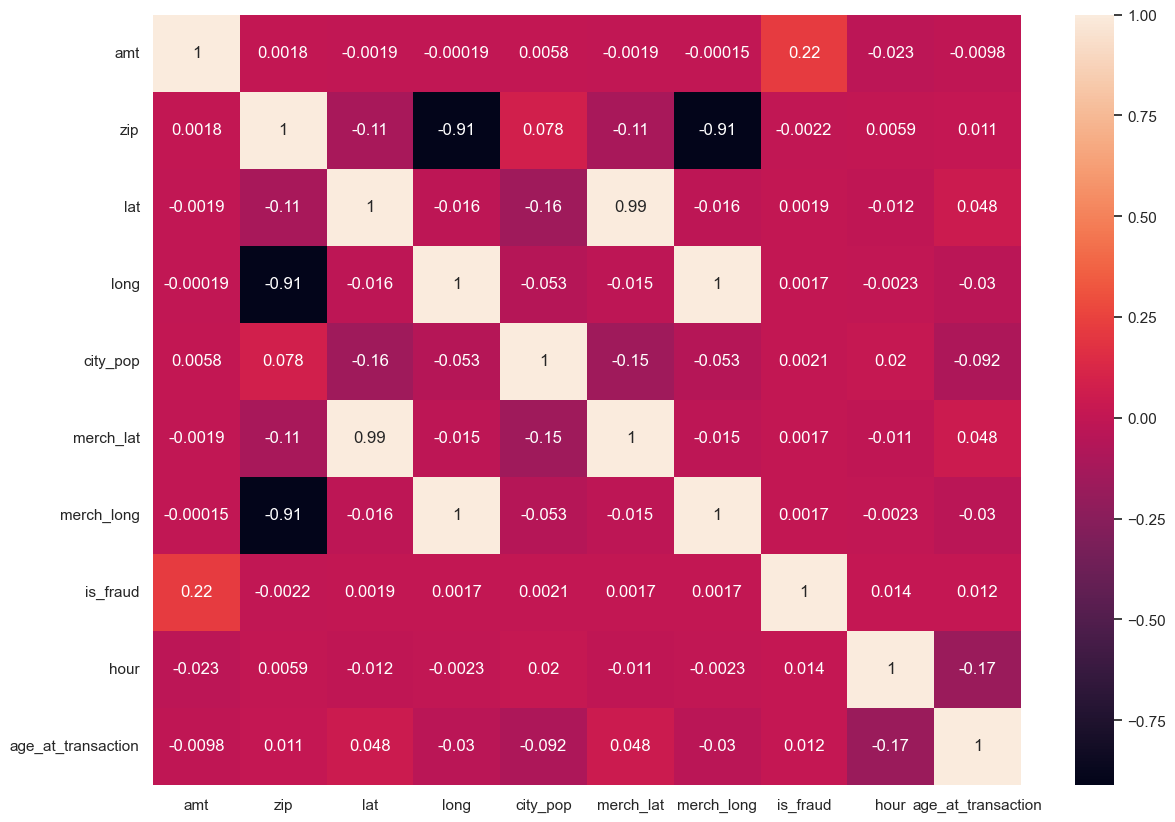

In [34]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see that there is a really high correlation between the columns 'long', 'merch_long' and 'zip', and also between 'lat' and 'merch_lat'.

We will remove 'merch_long', 'merch_lat' and 'zip'.

In [35]:
df = df.drop(['merch_long', 'merch_lat', 'zip'], axis=1)
test = test.drop(['merch_long', 'merch_lat', 'zip'], axis=1)

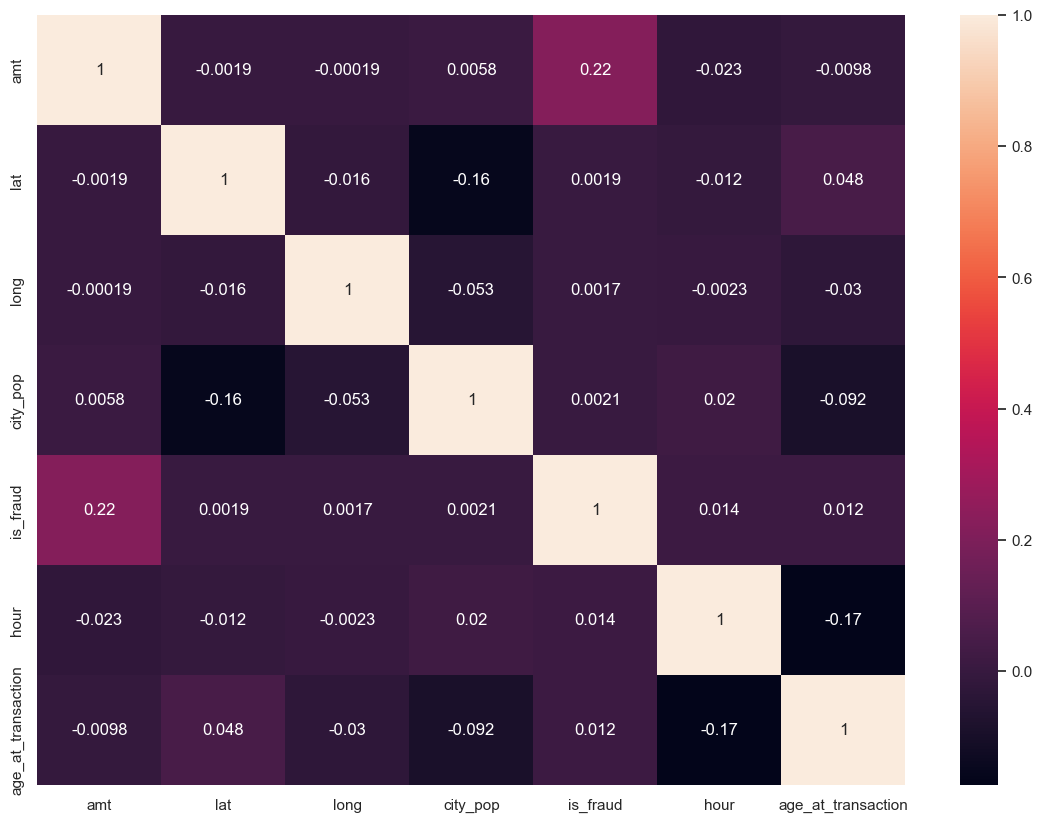

In [36]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### **EDA**

#### **Numerical Columns**

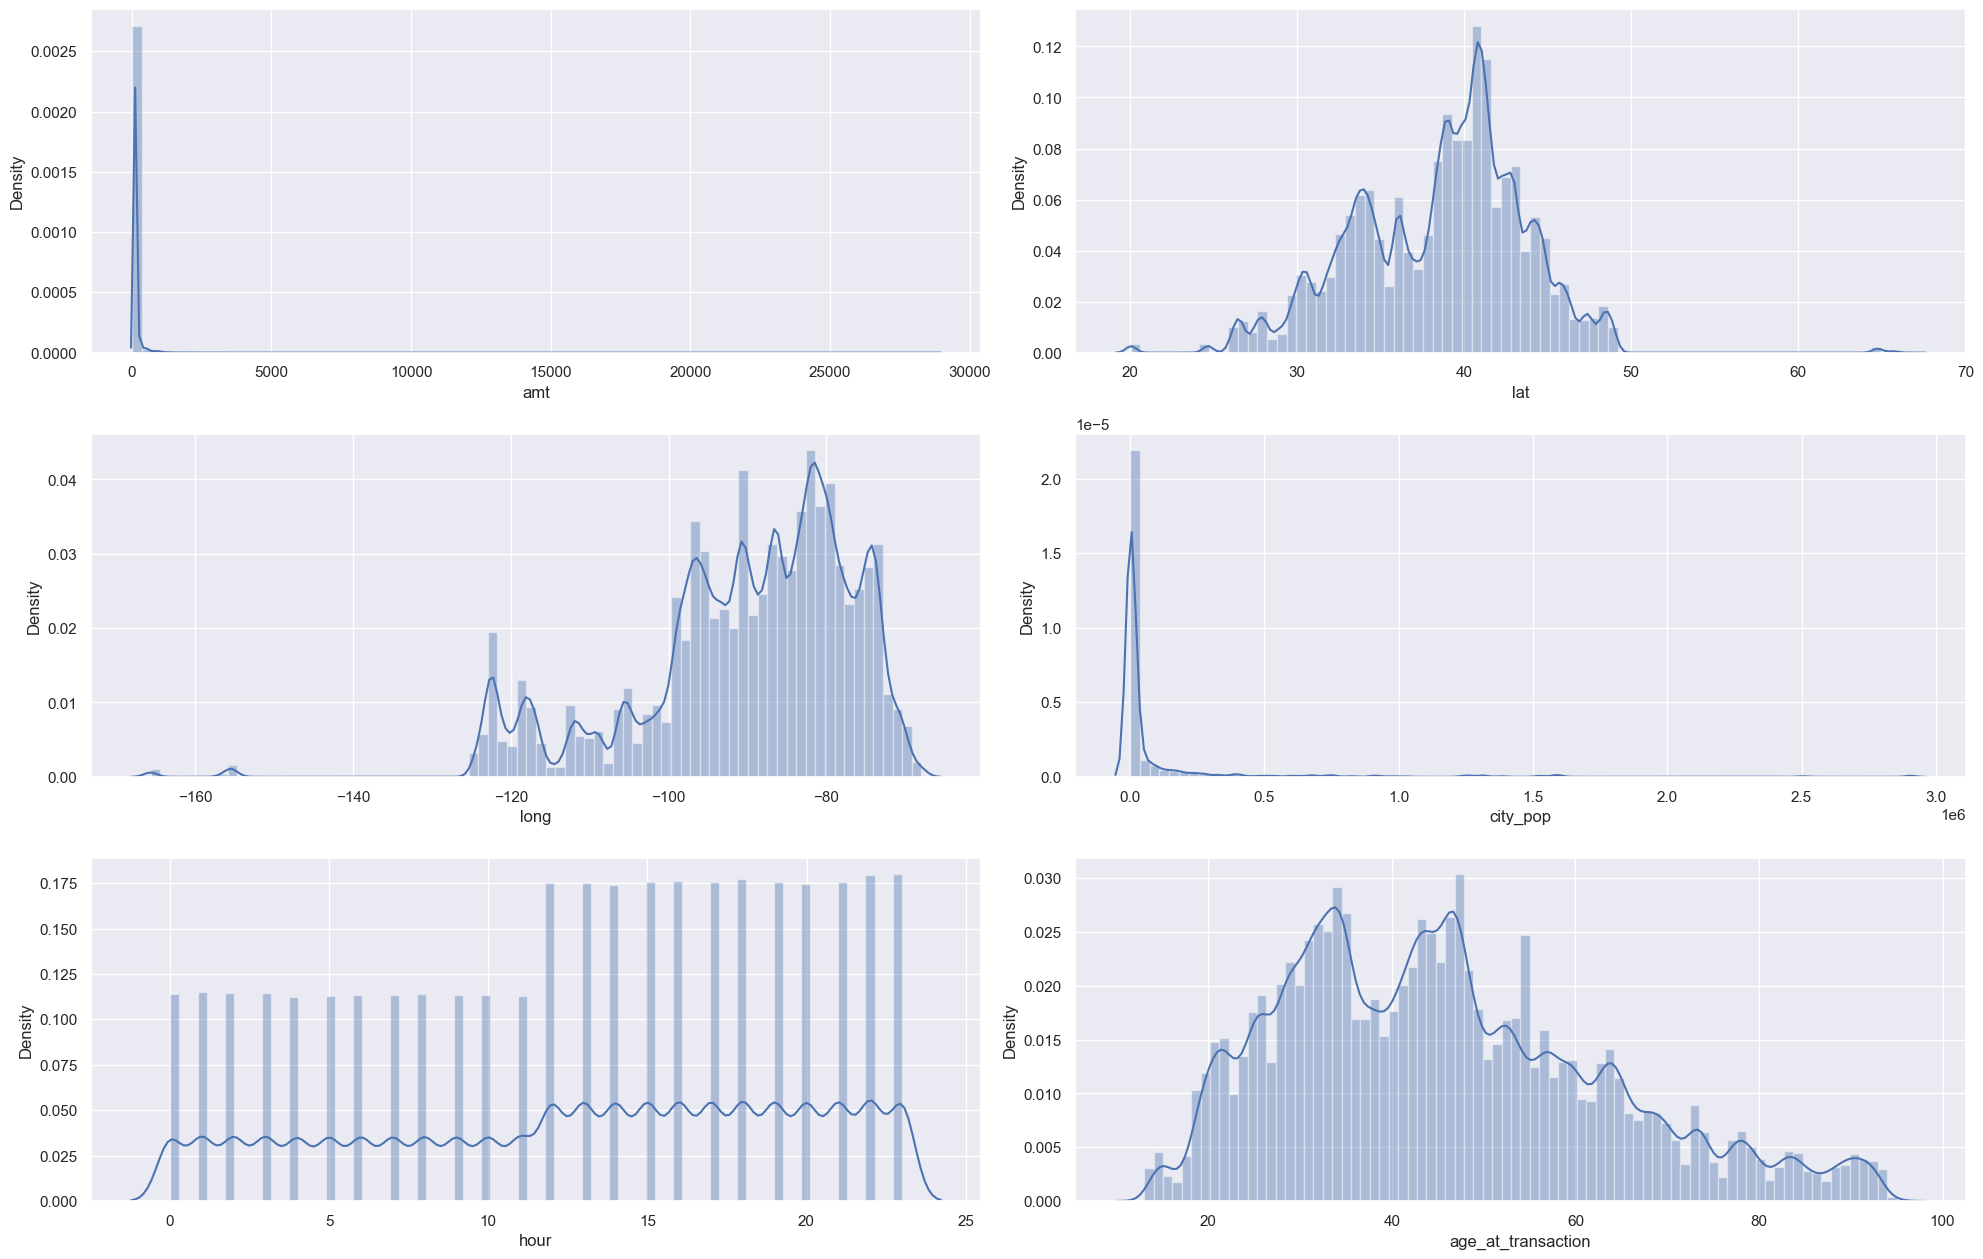

In [37]:
numerical_columns_df = df.select_dtypes(['int64', 'float', 'int32'])
numerical_columns = list(numerical_columns_df.columns)
numerical_columns.remove('is_fraud')

plt.figure(figsize=[20, 25])

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, i + 1)
    sns.distplot(df[col], bins=80)

plt.tight_layout()
plt.show()

we can see that most of the numerical columns in our dataset don't follow a normal distribution. We can transform the distribution to follow a normal distribution.

Below is a plot that demonstrates the relationship between the amount of money in transaction with the percentage of how much of these transactions were fraudulent or not.

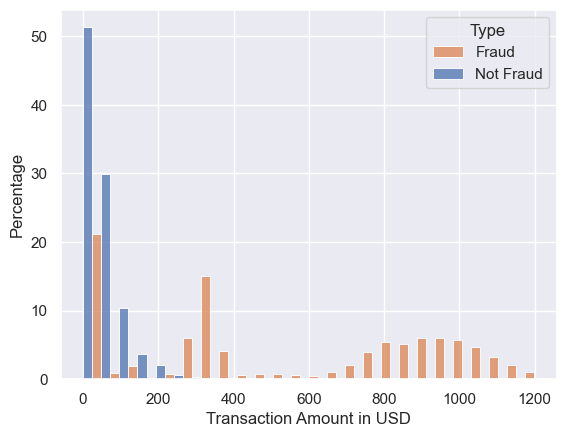

In [38]:
ax=sns.histplot(x='amt',data=df[df['amt']<1200],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

We can notice that most of non fraudulent transactions have an amount between 1 and 200 dollars, and some can go over 300 dollars, but for the fraudulent transactions, the amount can be between 1 and 1200 dollars, and a big percentage is between 600 and 1200.

#### **Age at Transaction**

In [39]:
fraud_df = df[df['is_fraud']==1]
non_fraud_df = df[df['is_fraud']==0]

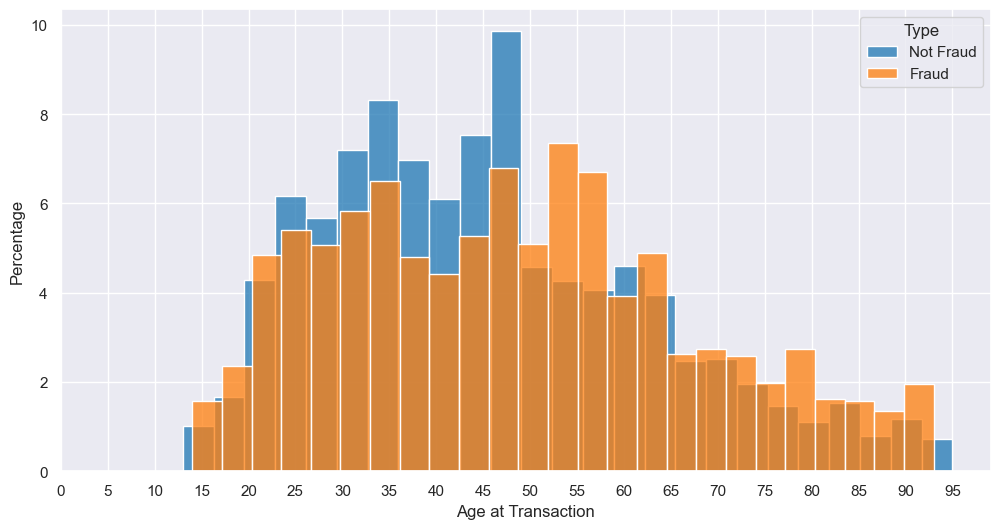

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with dodge option for side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the width and length here

sns.histplot(x='age_at_transaction', data=non_fraud_df, stat='percent', multiple='dodge', common_norm=False, bins=25, color='#1f77b4', ax=ax)
sns.histplot(x='age_at_transaction', data=fraud_df, stat='percent', multiple='dodge', common_norm=False, bins=25, color='#ff7f0e', ax=ax)

ax.set_ylabel('Percentage')
ax.set_xlabel('Age at Transaction')
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])

ticks = range(0, 100, 5)
plt.xticks(ticks)

plt.show()

Between 25 and 50, there are more non fraudulent transactions than the fraudulent transactions, and the peak is between 32 and 38, and between 46 and 50. After that, we see more fraudulent transactions, especially between 50 and 60. this column has a lot of information in it.

#### **Hour**

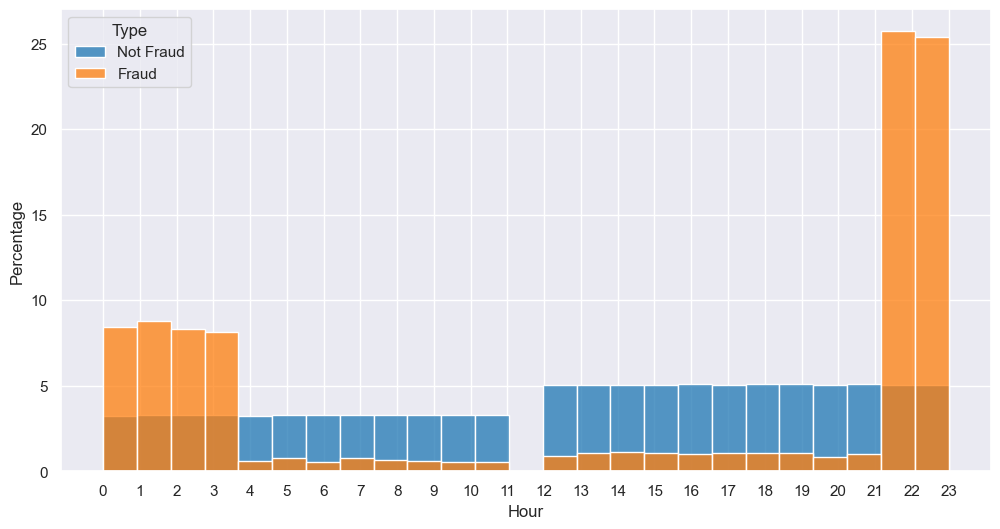

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with dodge option for side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the width and length here

sns.histplot(x='hour', data=non_fraud_df, stat='percent', multiple='dodge', common_norm=False, bins=25, color='#1f77b4', ax=ax)
sns.histplot(x='hour', data=fraud_df, stat='percent', multiple='dodge', common_norm=False, bins=25, color='#ff7f0e', ax=ax)

ax.set_ylabel('Percentage')
ax.set_xlabel('Hour')
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])

ticks = range(0, 24, 1)
plt.xticks(ticks)

plt.show()

it's clear that there are more fraudulent transactions between 10pm and 3am, after that there are more non fraudulent transactions.

#### **Categorical Columns**

##### **Gender**

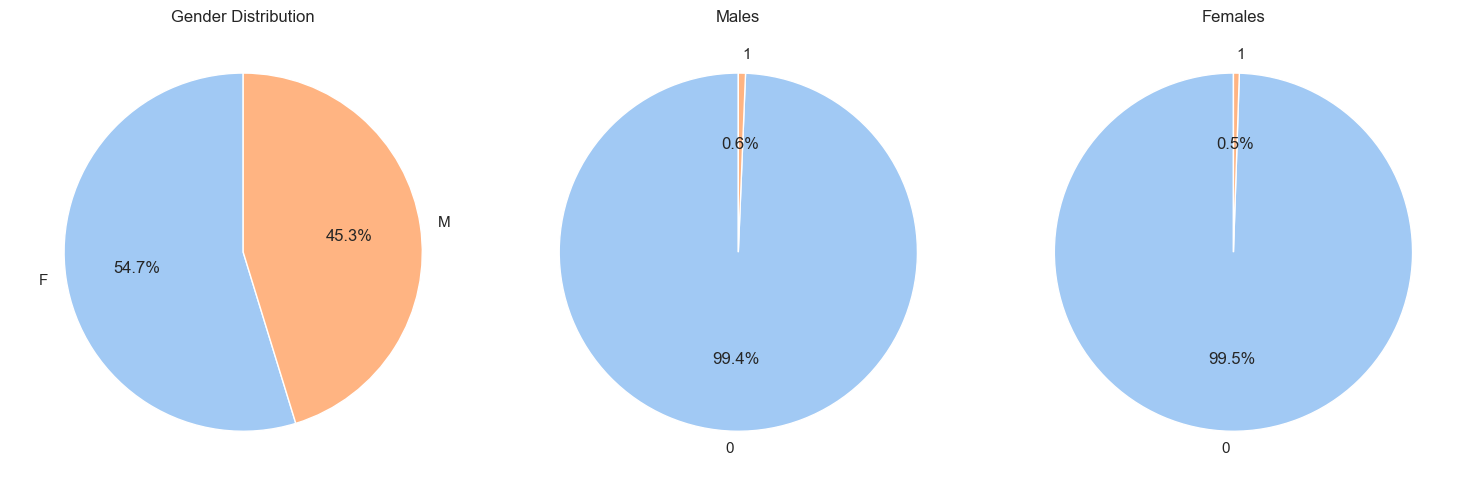

In [42]:
# Pie plot for the percentage of males and females in the dataset
class_counts = df['gender'].value_counts()
class_percentages = class_counts / len(df) * 100

colors = sns.color_palette('pastel')[0:5]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for the percentage of males and females
axes[0].set_title("Gender Distribution")
axes[0].pie(class_counts, labels=class_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')

male_df = df[df["gender"] == "M"]
female_df = df[df["gender"] == "F"]

class_counts_male = male_df['is_fraud'].value_counts()
class_percentages_male = class_counts_male / len(df) * 100

# Pie chart for the percentage of fraud and non-fraud transactions for males
axes[1].set_title("Males")
axes[1].pie(class_counts_male, labels=class_counts_male.index, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')

class_counts_female = female_df['is_fraud'].value_counts()
class_percentages_female = class_counts_female / len(df) * 100

# Pie chart for the percentage of fraud and non-fraud transactions for females
axes[2].set_title("Females")
axes[2].pie(class_counts_female, labels=class_counts_female.index, colors=colors, autopct='%1.1f%%', startangle=90)
axes[2].axis('equal')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

We can see from the first plot that females made 9.4% more transactions than males.

And we can also see that the percentage of fraud and non fraud among males and females is relatively the same.

Let's check the percentage of each gender in the fraud dataframe.

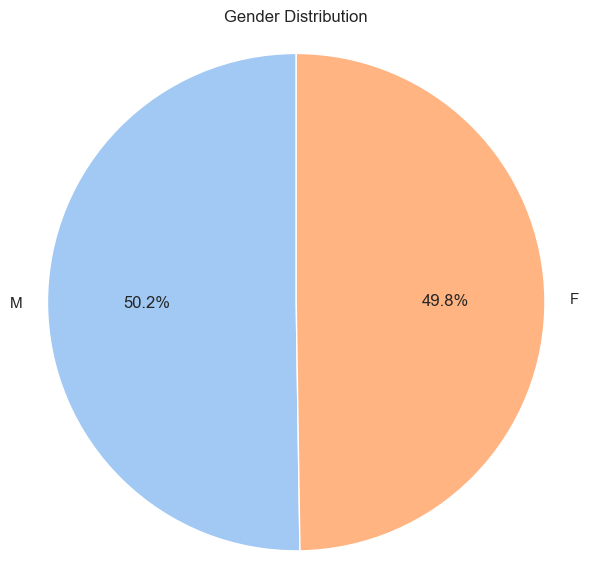

In [43]:
# Pie plot for the percentage of males and females in the dataset
class_counts = fraud_df['gender'].value_counts()
class_percentages = class_counts / len(fraud_df) * 100

colors = sns.color_palette('pastel')[0:5]

fig, ax = plt.subplots(figsize=(6, 6))  # Create a single set of axes

# Pie chart for the percentage of males and females
ax.set_title("Gender Distribution")
ax.pie(class_counts, labels=class_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

The pie plot shows a balance between the genders in both the fraudulent and non fraudulent transactions.

it's clear that this column won't carry any information concerning the target variable.

*We will drop this column.*

##### **cc_num**

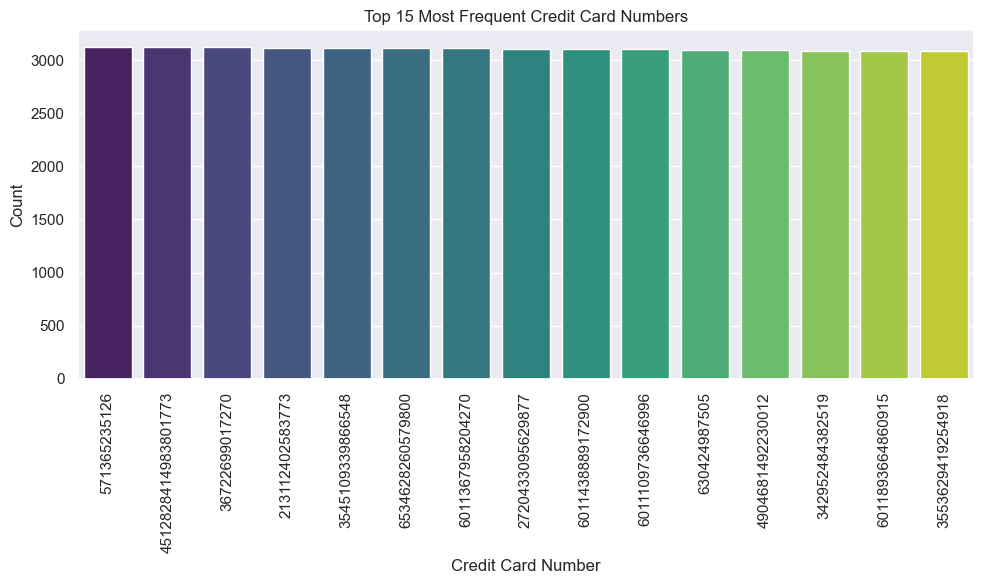

In [44]:
N = 15  # Number of top credit card numbers to display

# Calculate the counts for each credit card number
cc_num_counts = df['cc_num'].value_counts()

# Select the top N credit card numbers
top_cc_nums = cc_num_counts.head(N)

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='cc_num', data=df, order=top_cc_nums.index, palette='viridis')

plt.title(f'Top {N} Most Frequent Credit Card Numbers')
plt.xlabel('Credit Card Number')
plt.ylabel('Count')

plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

plt.tight_layout()
plt.show()

The 15 most frequent credit cards have a similar number of transactions, with a small difference.

Let's check the percentage of fraudulent and not fraudulent transactions on these 15 credit cards.

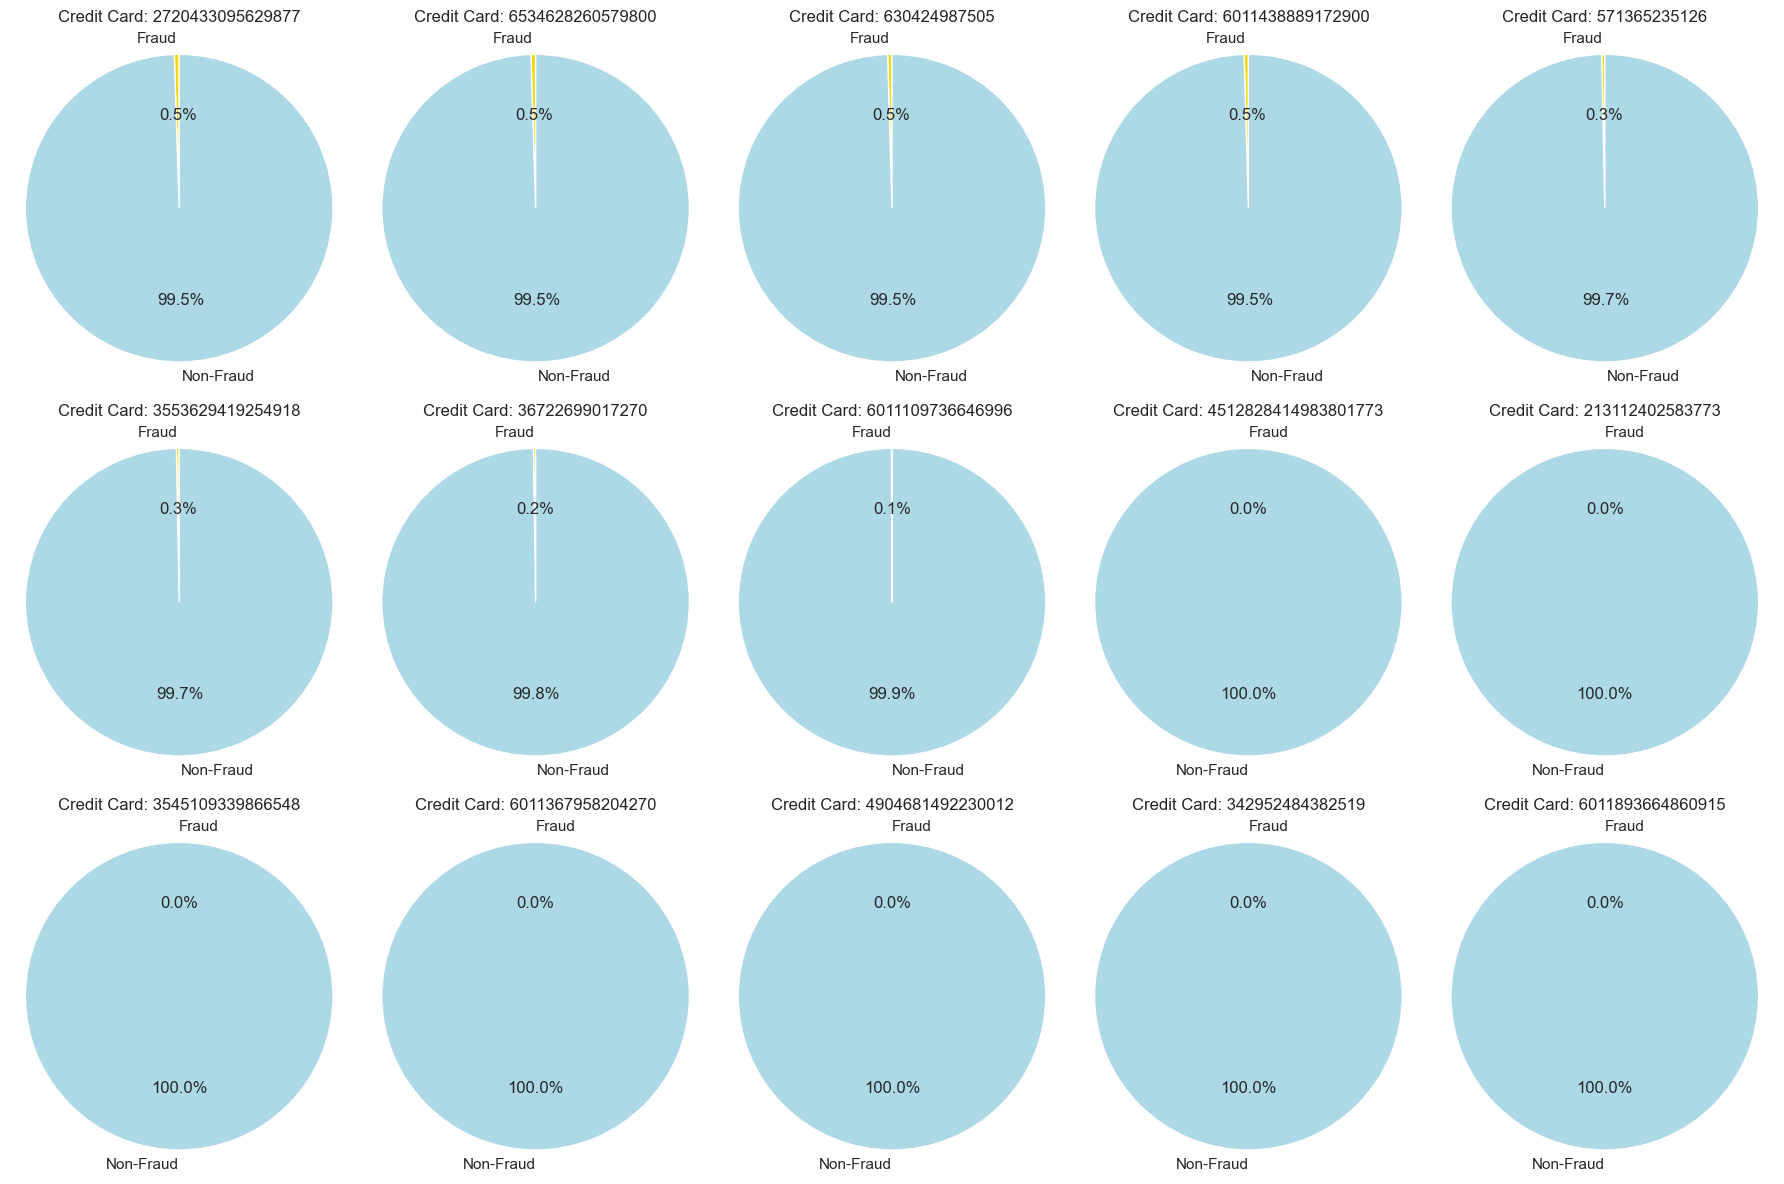

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by credit card number and transaction type (fraud or non-fraud)
grouped_data = df.groupby(['cc_num', 'is_fraud']).size().unstack()

# Get the top 15 most repeated credit cards
top_15_cards = grouped_data.sum(axis=1).nlargest(15).index

# Filter the data for the top 15 credit cards
top_15_data = grouped_data.loc[top_15_cards]

# Calculate the percentage of fraud and non-fraud transactions for each credit card
top_15_data['Total'] = top_15_data.sum(axis=1)
top_15_data['Fraud Percentage'] = (top_15_data[1] / top_15_data['Total']) * 100
top_15_data['Non-Fraud Percentage'] = (top_15_data[0] / top_15_data['Total']) * 100

# Sort the data by the fraud percentage in descending order
top_15_data = top_15_data.sort_values('Fraud Percentage', ascending=False)

# Plot the pie chart for each credit card showing the percentage of fraud and non-fraud transactions
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 12))
axes = axes.flatten()

for i, card_number in enumerate(top_15_data.index):
    data = top_15_data.loc[card_number, ['Fraud Percentage', 'Non-Fraud Percentage']]
    labels = ['Fraud', 'Non-Fraud']
    colors = ['#FFD700', '#ADD8E6']

    axes[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Credit Card: {card_number}')
    axes[i].axis('equal')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

There is a really low percentage of fraudulent transactions, on the 7 most frequent credit cards, and the rest are all legitimate transactions. This column is not going to help with identifying the fraudulent transactions.

*we will remove this column.*

##### **merchant**

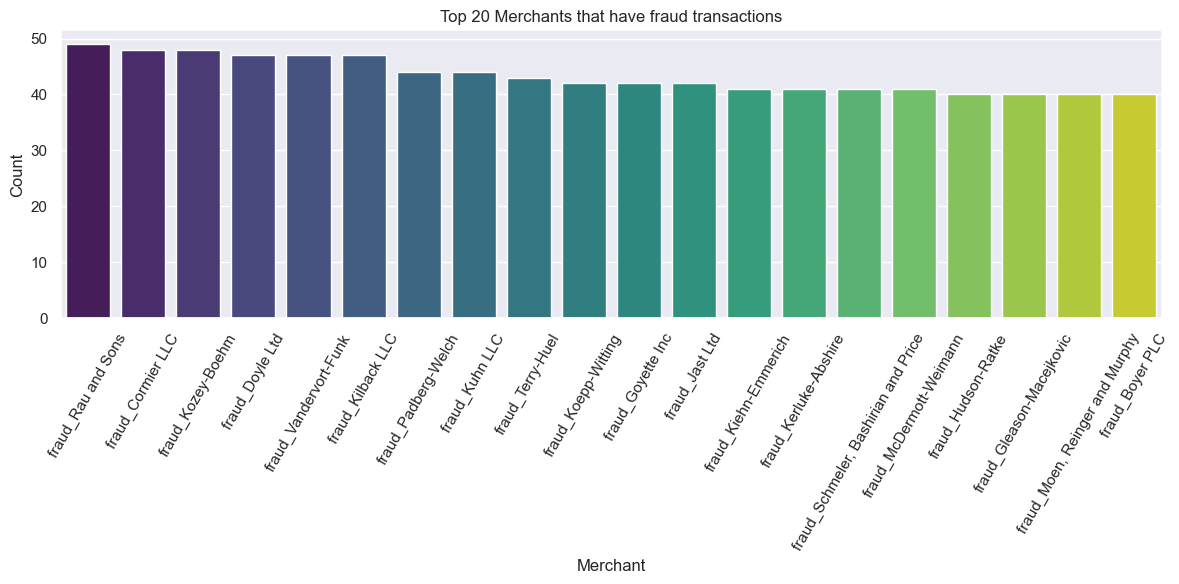

In [46]:
N = 20  # Number of top merchants to display

# Calculate the counts for each merchant
merchant_counts = fraud_df['merchant'].value_counts()

# Select the top N merchants
top_merchants = merchant_counts.head(N)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')

plt.title(f'Top {N} Merchants that have fraud transactions')
plt.xlabel('Merchant')
plt.ylabel('Count')

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

We can see that Rau and Sons have the highest number of fraudulent transactions.

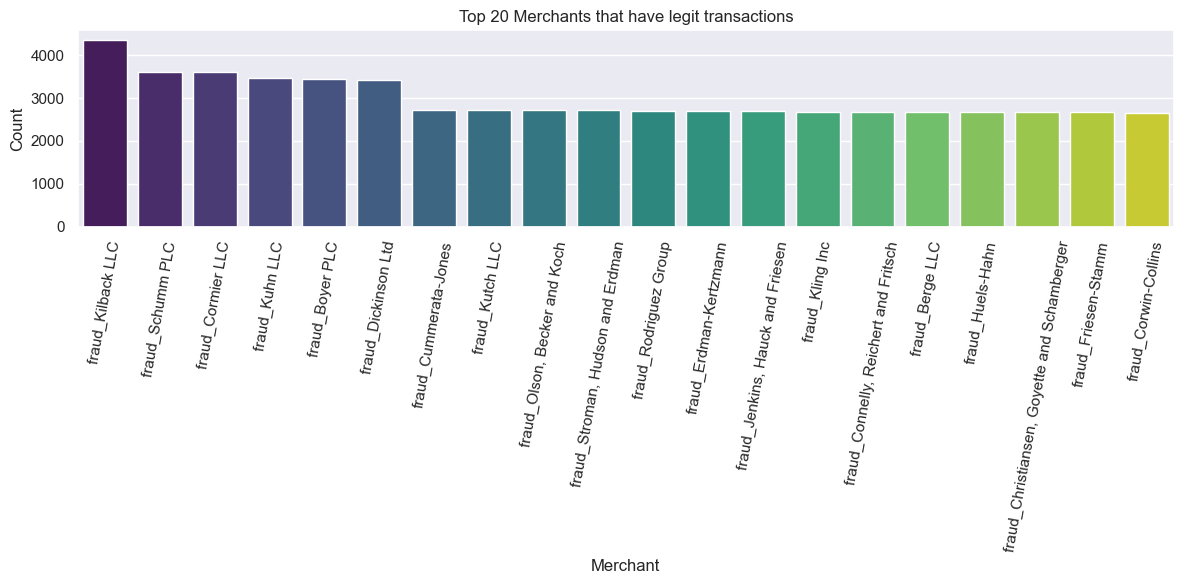

In [47]:
N = 20  # Number of top merchants to display

# Calculate the counts for each merchant
merchant_counts = non_fraud_df['merchant'].value_counts()

# Select the top N merchants
top_merchants = merchant_counts.head(N)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')

plt.title(f'Top {N} Merchants that have legit transactions')
plt.xlabel('Merchant')
plt.ylabel('Count')

plt.xticks(rotation=80)

plt.tight_layout()
plt.show()

Kilback LLC have the most legitimate transactions.

##### **category**

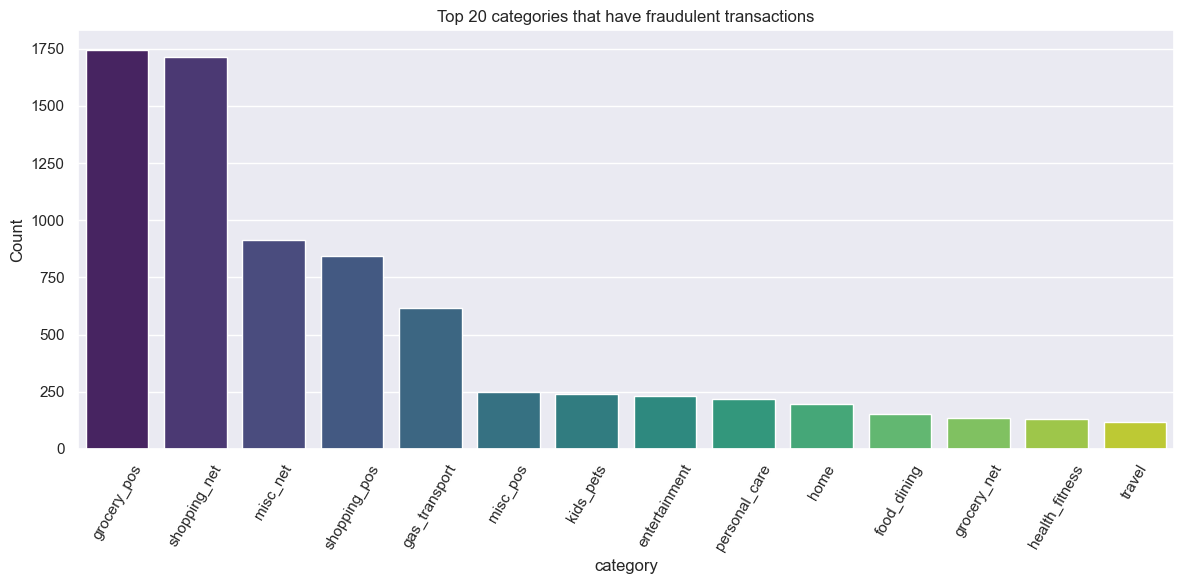

In [48]:
N = 20

# Calculate the counts for each category
category_counts = fraud_df['category'].value_counts()

# Select the top N categories
top_categorys = category_counts.head(N)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categorys.index, y=top_categorys.values, palette='viridis')

plt.title(f'Top {N} categories that have fraudulent transactions')
plt.xlabel('category')
plt.ylabel('Count')

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

grocery_pos and shopping_net have the highest number of fraudulent transactions.

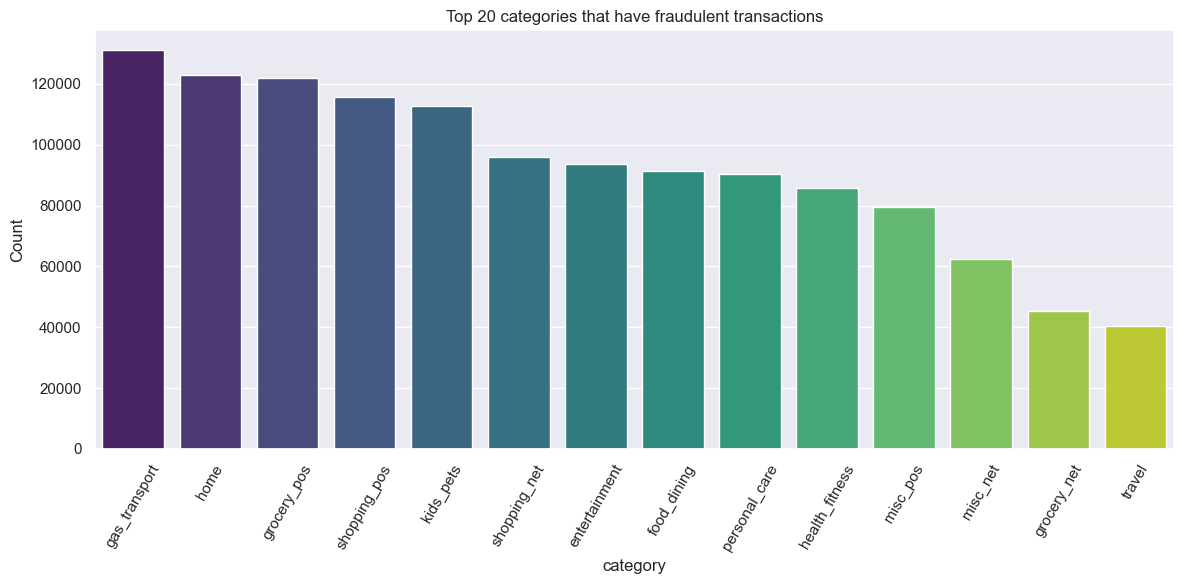

In [49]:
N = 20

# Calculate the counts for each category
category_counts = non_fraud_df['category'].value_counts()

# Select the top N categories
top_categorys = category_counts.head(N)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categorys.index, y=top_categorys.values, palette='viridis')

plt.title(f'Top {N} categories that have fraudulent transactions')
plt.xlabel('category')
plt.ylabel('Count')

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

##### **city**

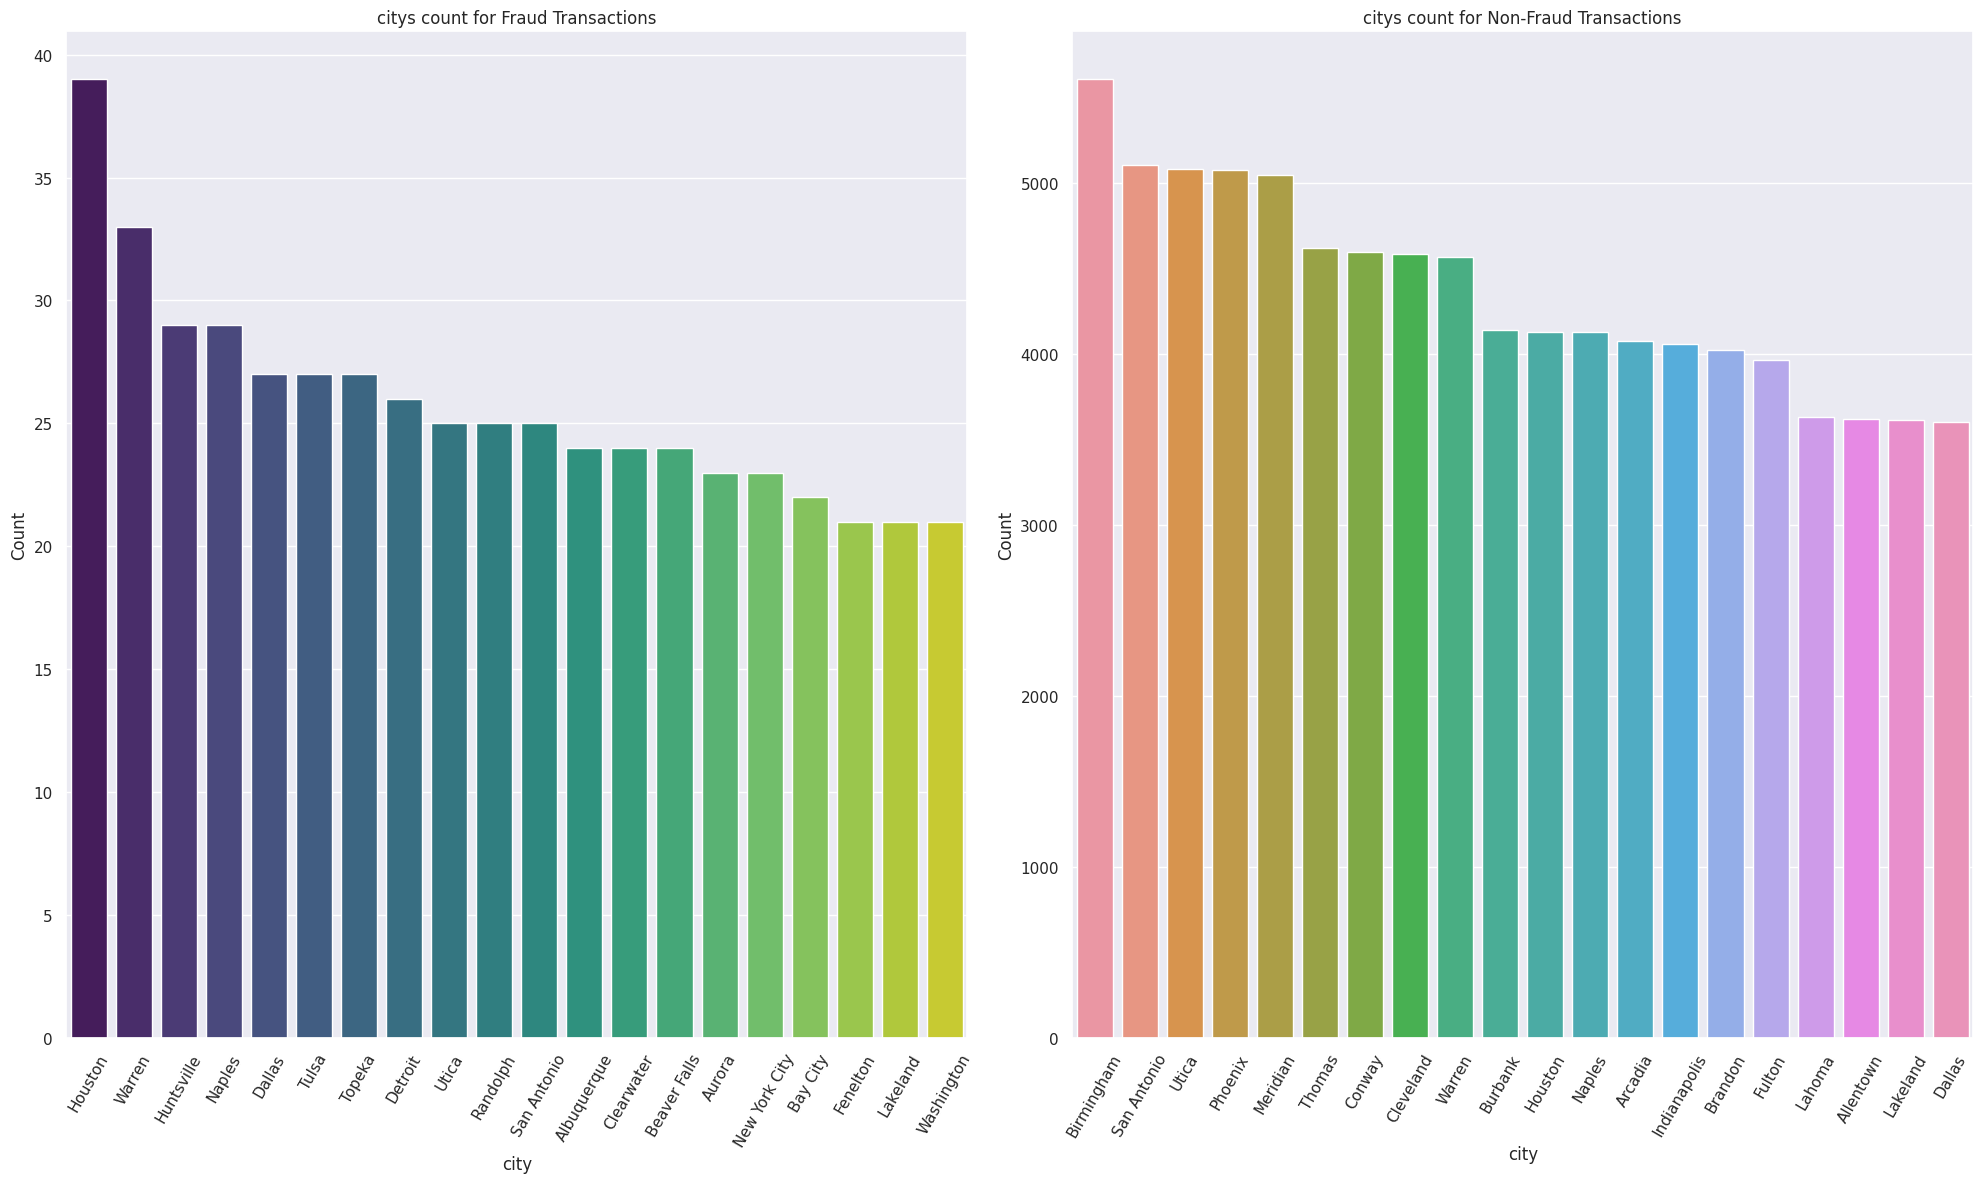

In [51]:
N = 20

# Get the top N most frequent values in the 'city' column for fraud_df and non_fraud_df
top_fraud_city = fraud_df['city'].value_counts().head(N).index
top_non_fraud_city = non_fraud_df['city'].value_counts().head(N).index

# Filter the dataframes to keep only the rows with the top N city
filtered_fraud_df = fraud_df[fraud_df['city'].isin(top_fraud_city)]
filtered_non_fraud_df = non_fraud_df[non_fraud_df['city'].isin(top_non_fraud_city)]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Plot the countplot for fraud_df
sns.countplot(data=filtered_fraud_df, x='city', order=top_fraud_city, ax=axes[0], palette='viridis')
axes[0].set_title('citys count for Fraud Transactions')
axes[0].set_xlabel('city')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_fraud_city, rotation=60)

# Plot the countplot for non_fraud_df
sns.countplot(data=filtered_non_fraud_df, x='city', order=top_non_fraud_city, ax=axes[1])
axes[1].set_title('citys count for Non-Fraud Transactions')
axes[1].set_xlabel('city')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_non_fraud_city, rotation=60)

plt.tight_layout()
plt.show()

Houston has the most amount of fraudulent transactions.

Birmingham has the least amount of fraudulent transactions.

##### **state**

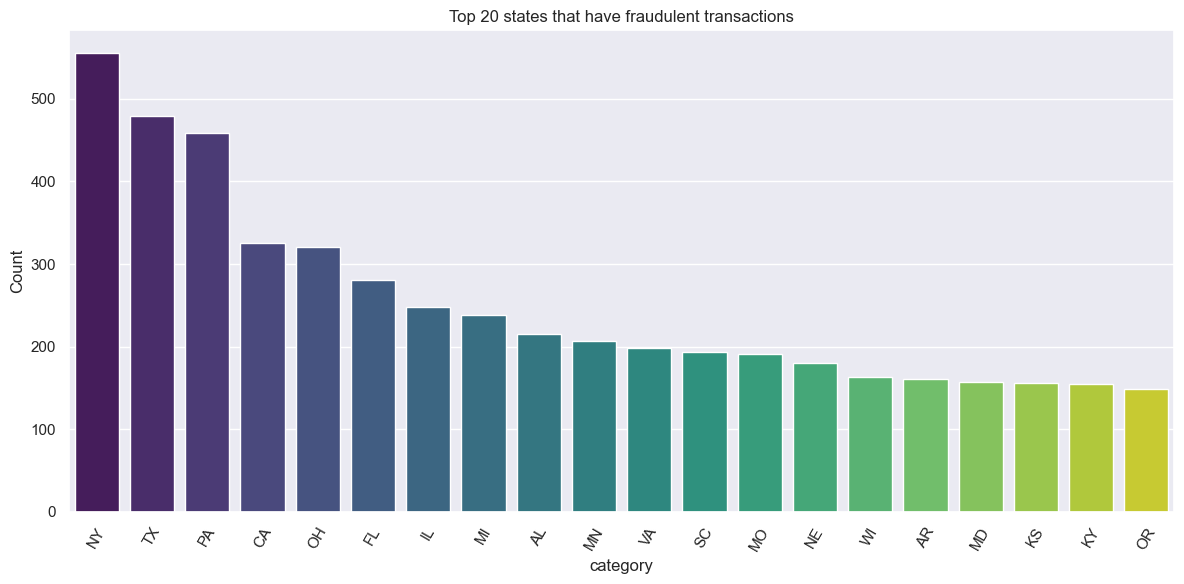

In [50]:
N = 20

# Calculate the counts for each category
state_counts = fraud_df['state'].value_counts()

# Select the top N categories
top_states = state_counts.head(N)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')

plt.title(f'Top {N} states that have fraudulent transactions')
plt.xlabel('category')
plt.ylabel('Count')

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

New York has the highest number of fraudulent transactions.

Texas has the lowest number of non fraudulent transactions.

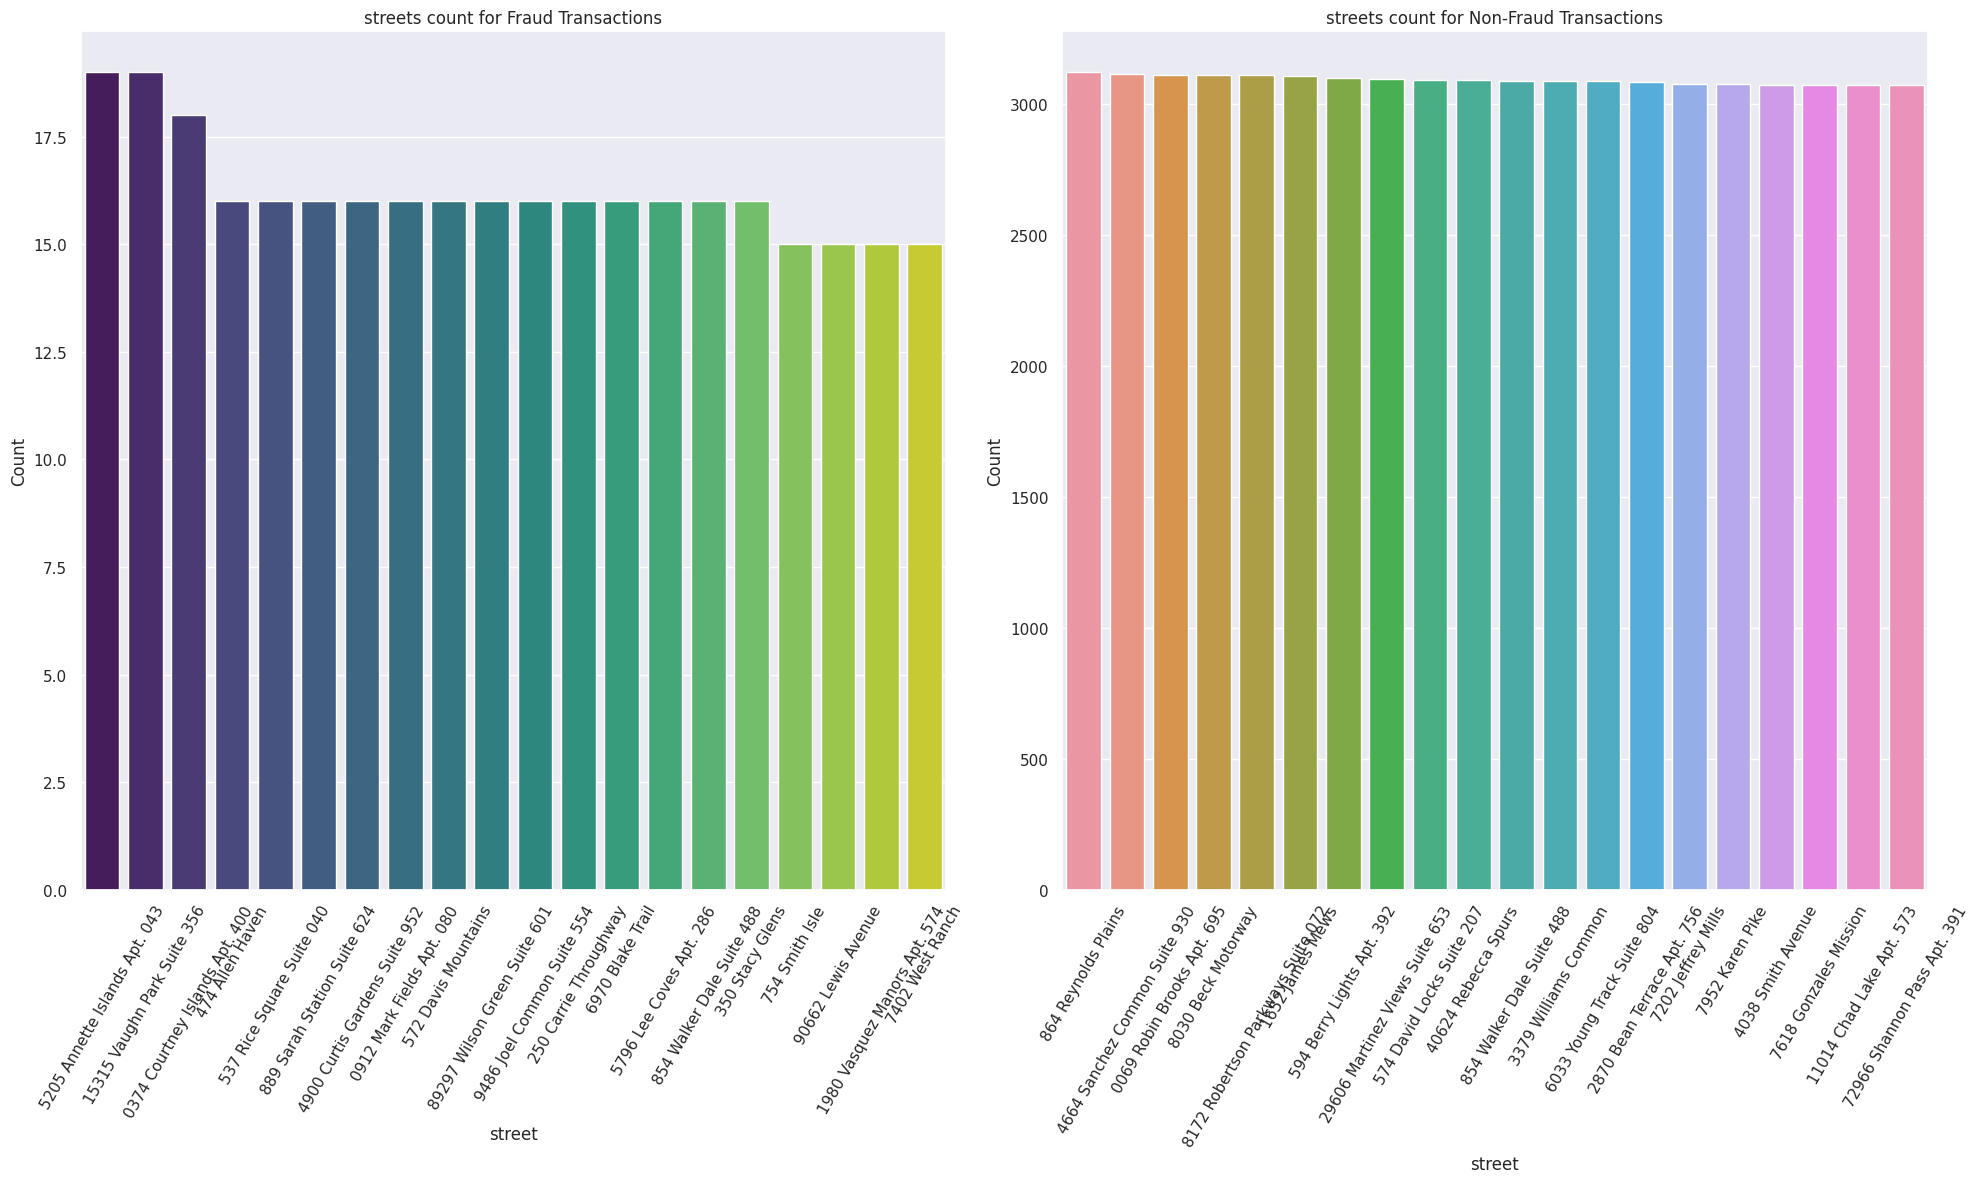

In [53]:
N = 20

# Get the top N most frequent values in the 'street' column for fraud_df and non_fraud_df
top_fraud_street = fraud_df['street'].value_counts().head(N).index
top_non_fraud_street = non_fraud_df['street'].value_counts().head(N).index

# Filter the dataframes to keep only the rows with the top N street
filtered_fraud_df = fraud_df[fraud_df['street'].isin(top_fraud_street)]
filtered_non_fraud_df = non_fraud_df[non_fraud_df['street'].isin(top_non_fraud_street)]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Plot the countplot for fraud_df
sns.countplot(data=filtered_fraud_df, x='street', order=top_fraud_street, ax=axes[0], palette='viridis')
axes[0].set_title('streets count for Fraud Transactions')
axes[0].set_xlabel('street')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_fraud_street, rotation=60)

# Plot the countplot for non_fraud_df
sns.countplot(data=filtered_non_fraud_df, x='street', order=top_non_fraud_street, ax=axes[1])
axes[1].set_title('streets count for Non-Fraud Transactions')
axes[1].set_xlabel('street')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_non_fraud_street, rotation=60)

plt.tight_layout()
plt.show()


For the street column, it looks like the count of the streets for non fraudulent transaction are too close in count.

For fraudulent transactions, there is a small gap between the streets.

*We are going to remove this column.*

##### **job**

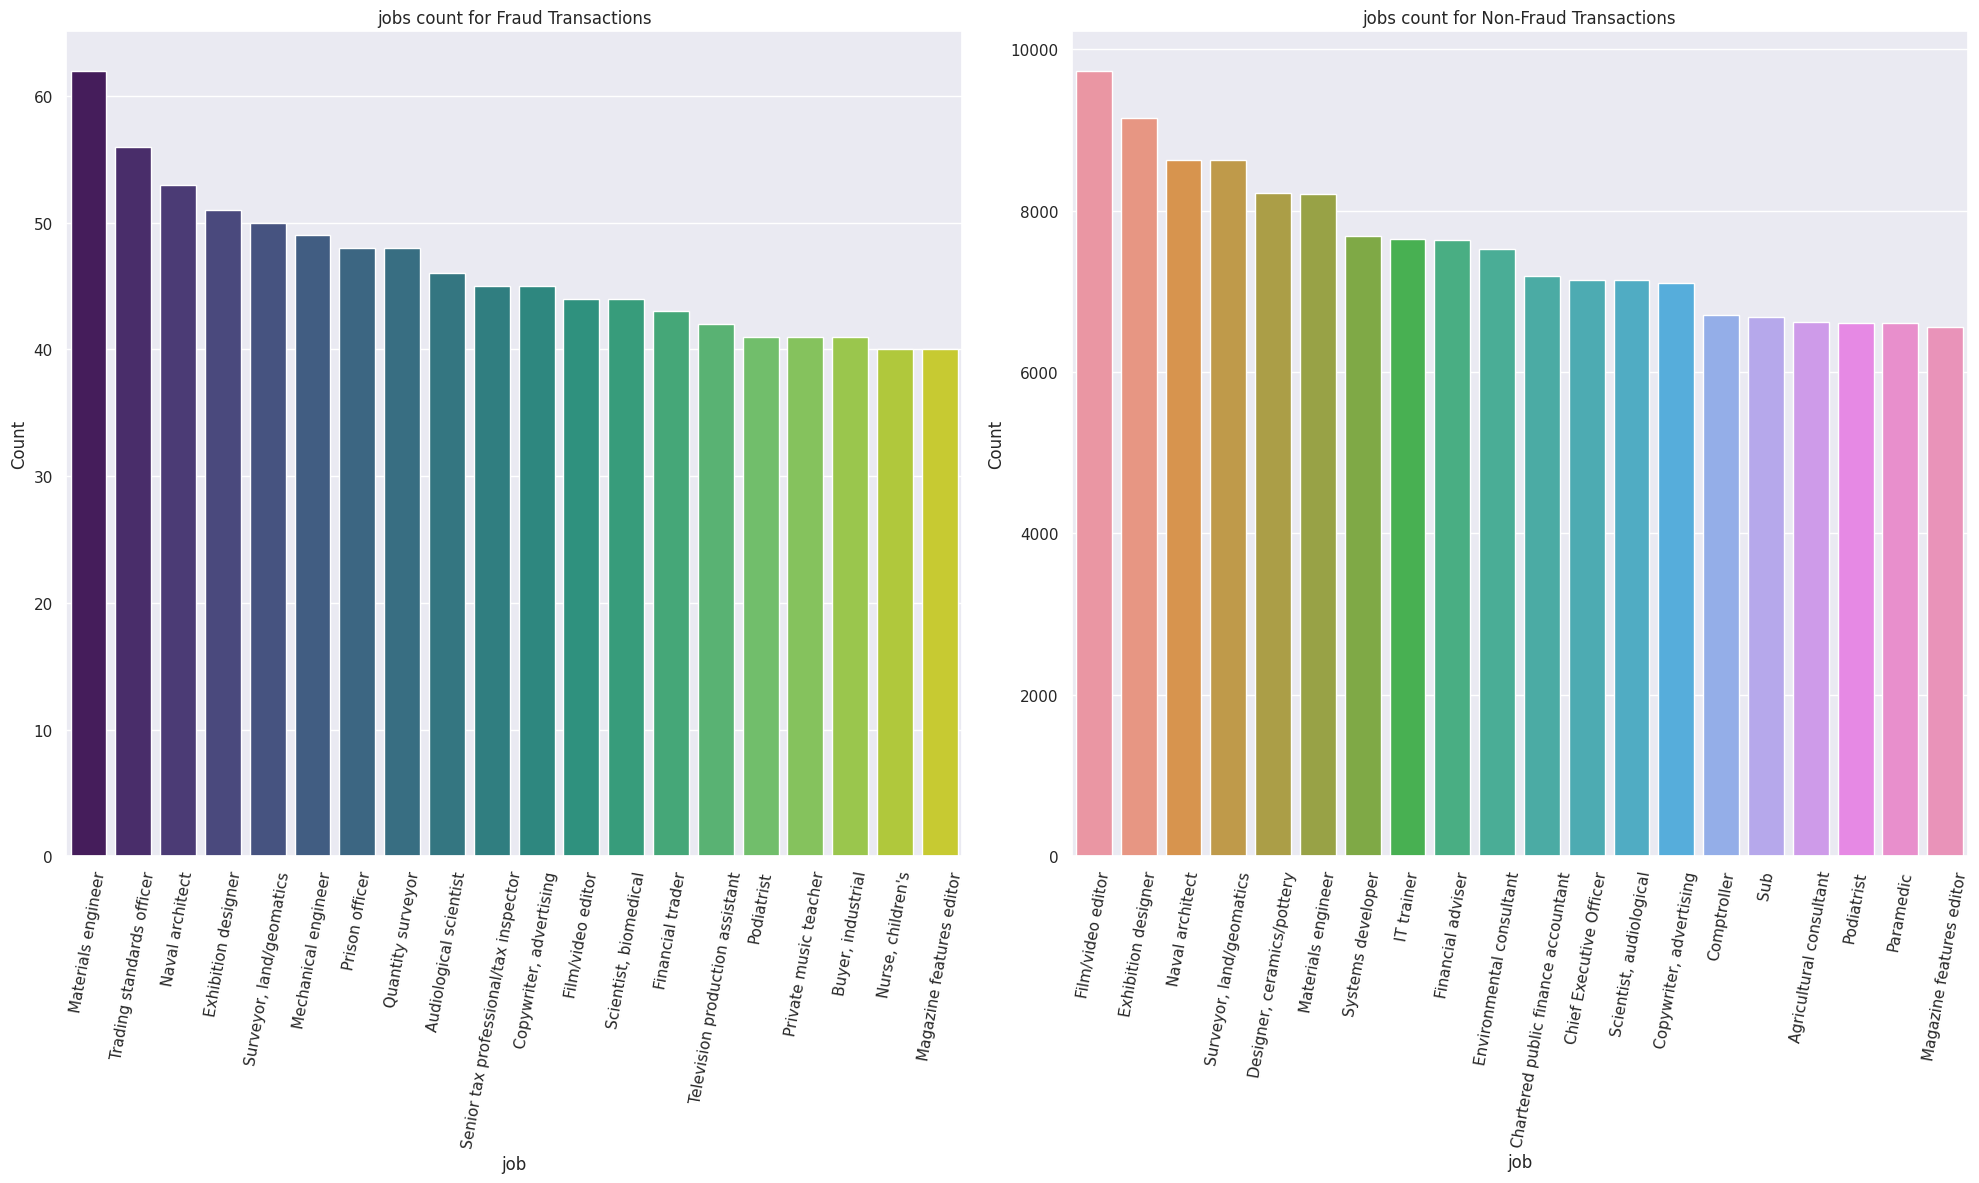

In [54]:
N = 20

# Get the top N most frequent values in the 'job' column for fraud_df and non_fraud_df
top_fraud_job = fraud_df['job'].value_counts().head(N).index
top_non_fraud_job = non_fraud_df['job'].value_counts().head(N).index

# Filter the dataframes to keep only the rows with the top N job
filtered_fraud_df = fraud_df[fraud_df['job'].isin(top_fraud_job)]
filtered_non_fraud_df = non_fraud_df[non_fraud_df['job'].isin(top_non_fraud_job)]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Plot the countplot for fraud_df
sns.countplot(data=filtered_fraud_df, x='job', order=top_fraud_job, ax=axes[0], palette='viridis')
axes[0].set_title('jobs count for Fraud Transactions')
axes[0].set_xlabel('job')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_fraud_job, rotation=80)

# Plot the countplot for non_fraud_df
sns.countplot(data=filtered_non_fraud_df, x='job', order=top_non_fraud_job, ax=axes[1])
axes[1].set_title('jobs count for Non-Fraud Transactions')
axes[1].set_xlabel('job')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_non_fraud_job, rotation=80)

plt.tight_layout()
plt.show()

Materials engineer is the job with the most fraudulent transactions.

Film/video editing is the job with the most non fraudulent transactions.

#### **Remove the unnecessary columns**

In [144]:
df = df.drop(['gender', 'cc_num', 'street'], axis=1)
test = test.drop(['gender', 'cc_num', 'street'], axis=1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   merchant            1296675 non-null  object        
 1   category            1296675 non-null  object        
 2   amt                 1296675 non-null  float64       
 3   city                1296675 non-null  object        
 4   state               1296675 non-null  object        
 5   lat                 1296675 non-null  float64       
 6   long                1296675 non-null  float64       
 7   city_pop            1296675 non-null  int64         
 8   job                 1296675 non-null  object        
 9   is_fraud            1296675 non-null  int64         
 10  hour                1296675 non-null  int64         
 11  trans_date          1296675 non-null  datetime64[ns]
 12  age_at_transaction  1296675 non-null  int64         
dtypes: datetime6

### **Data Encoding**

#### **K-Fold Target Encoding**

In [146]:
import category_encoders
from sklearn import base
from sklearn.model_selection import KFold

class KFoldTargetEncoderTrain(base.BaseEstimator,base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True, random_state=2019)
        print(kf)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            #train set and validation set
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            #test set you take the average of the target values of all samples that have a given category in the entire train set.
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName,
                   np.corrcoef(X[self.targetName].values,
                               encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [147]:
categ_col_df = df.select_dtypes(['object', 'category'])
categ_col = list(categ_col_df.columns)
categ_col.remove('category')
categ_col

['merchant', 'city', 'state', 'job']

In [148]:
new_df = df.copy()
new_test = test.copy()

In [149]:
for col in categ_col:
    targetc = KFoldTargetEncoderTrain(col,'is_fraud',n_fold=5)
    new_df = targetc.fit_transform(new_df)
    new_df = new_df.drop(col, axis=1)

KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, merchant_Kfold_Target_Enc and, is_fraud is 0.06546289884167414.
KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, city_Kfold_Target_Enc and, is_fraud is 0.2812019537548889.
KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, state_Kfold_Target_Enc and, is_fraud is 0.036742762872527805.
KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, job_Kfold_Target_Enc and, is_fraud is 0.1709477083474734.


In [150]:
for col in categ_col:
    targetc = KFoldTargetEncoderTrain(col,'is_fraud',n_fold=5)
    new_test = targetc.fit_transform(new_test)
    new_test = new_test.drop(col, axis=1)

KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, merchant_Kfold_Target_Enc and, is_fraud is 0.04712874696172704.
KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, city_Kfold_Target_Enc and, is_fraud is 0.27357642841972624.
KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, state_Kfold_Target_Enc and, is_fraud is 0.02335744374048896.
KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, job_Kfold_Target_Enc and, is_fraud is 0.14426154966102997.


In [151]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

columns_to_encode = ['category']

encoded_columns = one_hot_encoder.fit_transform(new_df[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

new_df = pd.concat([new_df, encoded_df], axis=1)

new_df.drop(columns_to_encode, axis=1, inplace=True)

In [152]:
encoded_columns = one_hot_encoder.fit_transform(new_test[columns_to_encode])

encoded_new_test = pd.DataFrame(encoded_columns.toarray(), columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

new_test = pd.concat([new_test, encoded_new_test], axis=1)

new_test.drop(columns_to_encode, axis=1, inplace=True)

In [153]:
# extract the year month and day from the trans_date column

new_df['year'] = new_df.trans_date.dt.year
new_df['month'] = new_df.trans_date.dt.month
new_df['day'] = new_df.trans_date.dt.day

new_test['year'] = new_test.trans_date.dt.year
new_test['month'] = new_test.trans_date.dt.month
new_test['day'] = new_test.trans_date.dt.day

new_df = new_df.drop('trans_date', axis=1)
new_test = new_test.drop('trans_date', axis=1)

new_df.dtypes

amt                          float64
lat                          float64
long                         float64
city_pop                       int64
is_fraud                       int64
hour                           int64
age_at_transaction             int64
merchant_Kfold_Target_Enc    float64
city_Kfold_Target_Enc        float64
state_Kfold_Target_Enc       float64
job_Kfold_Target_Enc         float64
category_entertainment       float64
category_food_dining         float64
category_gas_transport       float64
category_grocery_net         float64
category_grocery_pos         float64
category_health_fitness      float64
category_home                float64
category_kids_pets           float64
category_misc_net            float64
category_misc_pos            float64
category_personal_care       float64
category_shopping_net        float64
category_shopping_pos        float64
category_travel              float64
year                           int64
month                          int64
d

In [154]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   amt                        1296675 non-null  float64
 1   lat                        1296675 non-null  float64
 2   long                       1296675 non-null  float64
 3   city_pop                   1296675 non-null  int64  
 4   is_fraud                   1296675 non-null  int64  
 5   hour                       1296675 non-null  int64  
 6   age_at_transaction         1296675 non-null  int64  
 7   merchant_Kfold_Target_Enc  1296675 non-null  float64
 8   city_Kfold_Target_Enc      1296675 non-null  float64
 9   state_Kfold_Target_Enc     1296675 non-null  float64
 10  job_Kfold_Target_Enc       1296675 non-null  float64
 11  category_entertainment     1296675 non-null  float64
 12  category_food_dining       1296675 non-null  float64
 13  category_gas

In [155]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   amt                        555719 non-null  float64
 1   lat                        555719 non-null  float64
 2   long                       555719 non-null  float64
 3   city_pop                   555719 non-null  int64  
 4   is_fraud                   555719 non-null  int64  
 5   hour                       555719 non-null  int64  
 6   age_at_transaction         555719 non-null  int64  
 7   merchant_Kfold_Target_Enc  555719 non-null  float64
 8   city_Kfold_Target_Enc      555719 non-null  float64
 9   state_Kfold_Target_Enc     555719 non-null  float64
 10  job_Kfold_Target_Enc       555719 non-null  float64
 11  category_entertainment     555719 non-null  float64
 12  category_food_dining       555719 non-null  float64
 13  category_gas_transport     55

# **ML**

## **Without Balancing the data**

In [ ]:
new_df.dtypes.value_counts()

float64    21
int64       7
dtype: int64

In [ ]:
new_test.dtypes.value_counts()

float64    21
int64       7
dtype: int64

In [ ]:
from pycaret.classification import *

s = setup(data=new_df,
          target='is_fraud',
          index=False,
          test_data=new_test,
          # max_encoding_ohe = 100,
          #feature_selection=True,
          #feature_selection_method="sequential",
          #feature_selection_estimator="catboost",
          #n_features_to_select=0.70,
          normalize=True,
          #normalize_method="zscore",
          normalize_method="minmax",
          transformation=True,
          transformation_method = 'yeo-johnson',
          fold=5,
          # session_id=99,
          #log_experiment=True,
          #experiment_name="comparer_all",
          use_gpu=True
          )

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[I] [18:08:54.141993] Unused keyword parameter: n_jobs during cuML estimator initialization


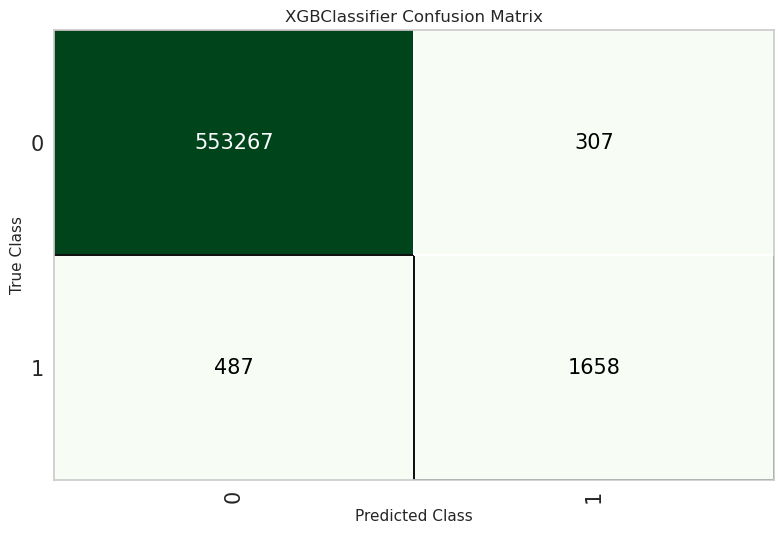

In [ ]:
no_balance_model = compare_models(sort='F1')
no_balance_predictions = predict_model(no_balance_model)
plot_model(no_balance_model, plot="confusion_matrix")

## **Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
rus = RandomUnderSampler()
x_train = new_df.drop("is_fraud", axis=1)
y_train = new_df["is_fraud"]

rus_x_train, rus_y_train = rus.fit_resample(x_train, y_train)

under_sampled_df = pd.concat([pd.DataFrame(rus_x_train, columns=x_train.columns), pd.Series(rus_y_train, name='is_fraud')], axis=1)

In [ ]:
under_sampled_df['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [ ]:
under_sampled_df.shape

(15012, 28)

In [ ]:
from pycaret.classification import *

s = setup(data=under_sampled_df,
          target='is_fraud',
          index=False,
          test_data=new_test,
          #max_encoding_ohe = 100,
          #feature_selection=True,
          #feature_selection_method="sequential",
          #feature_selection_estimator="catboost",
          #n_features_to_select=0.70,
          normalize=True,
          ##normalize_method="zscore",
          normalize_method="minmax",
          transformation=True,
          transformation_method = 'yeo-johnson',
          fold=5,
          # session_id=99,
          #log_experiment=True,
          #experiment_name="comparer_all",
          use_gpu=True
          )

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[I] [20:12:25.743510] Unused keyword parameter: n_jobs during cuML estimator initialization


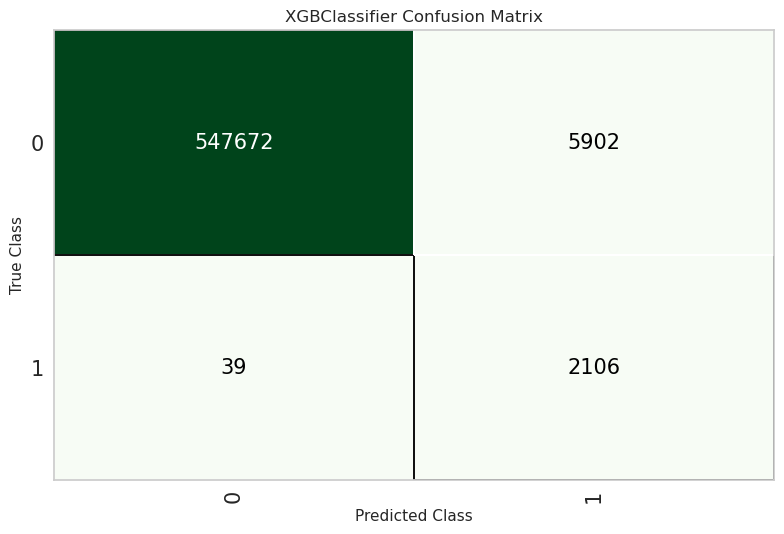

In [ ]:
under_sampled_model = compare_models(sort='F1')
US_model_predictions = predict_model(under_sampled_model)
plot_model(under_sampled_model, plot='confusion_matrix')

## **Random Over Sampling**

In [ ]:
from imblearn import over_sampling

X = new_df.drop('is_fraud', axis=1)
y = new_df['is_fraud']

oversampler = over_sampling.RandomOverSampler()

x_train, y_train = oversampler.fit_resample(X, y)

over_sampled_df = pd.concat([pd.DataFrame(x_train, columns=X.columns), pd.Series(y_train, name='is_fraud')], axis=1)

over_sampled_df["is_fraud"].value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [ ]:
from pycaret.classification import *

s = setup(data=over_sampled_df,
          target='is_fraud',
          index=False,
          #train_size=0.8,
          test_data=new_test,
          #max_encoding_ohe = 40,
          #feature_selection=True,
          #feature_selection_method="sequential",
          #feature_selection_estimator="catboost",
          #n_features_to_select=0.70,
          normalize=True,
          ##normalize_method="zscore",
          normalize_method="minmax",
          transformation=True,
          transformation_method = 'yeo-johnson',
          fold=5,
          # session_id=99,
          #log_experiment=True,
          #experiment_name="comparer_all",
          use_gpu=True
          )

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[I] [20:44:44.445047] Unused keyword parameter: n_jobs during cuML estimator initialization


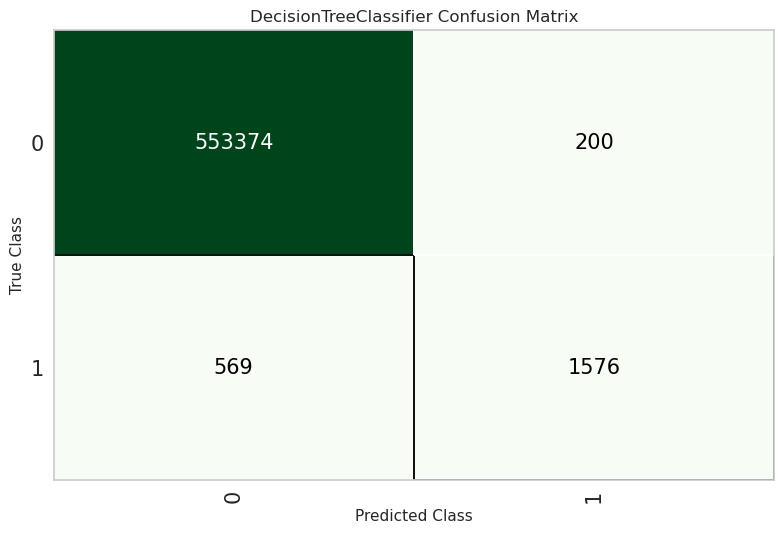

In [ ]:
over_sampled_model = compare_models(sort='F1')
OS_model_predictions = predict_model(over_sampled_model)
plot_model(over_sampled_model, plot='confusion_matrix')

### **Catboost**

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

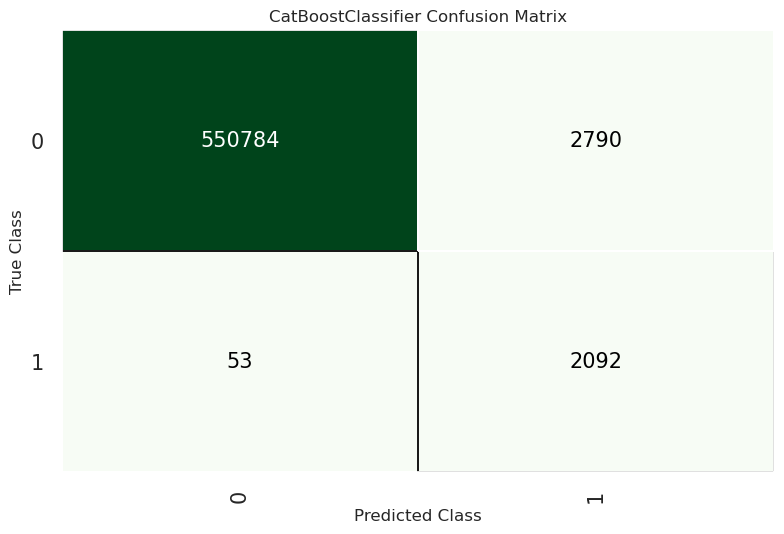

In [ ]:
catBoost_os_model = create_model('catboost')
catBoost_os_model_predictions = predict_model(catBoost_os_model)
plot_model(catBoost_os_model, plot='confusion_matrix')

### **Light GBM**

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

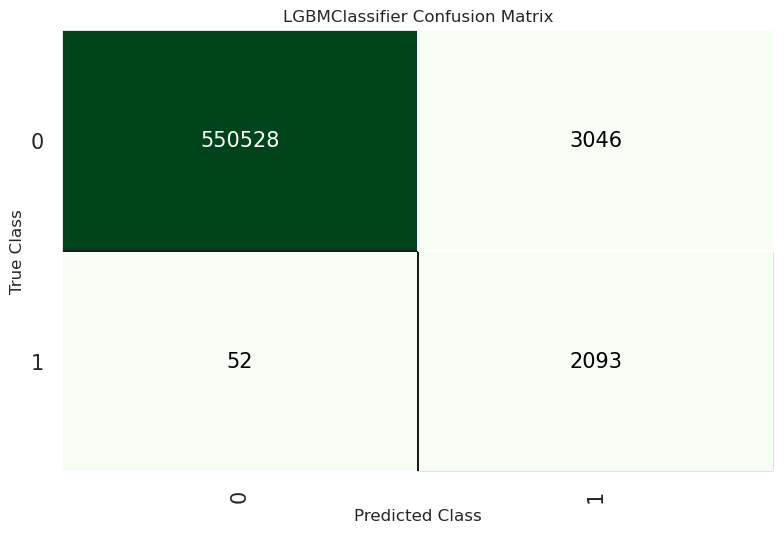

In [ ]:
lightGBM_os_model = create_model('lightgbm')
lightGBM_os_model_predictions = predict_model(lightGBM_os_model)
plot_model(lightGBM_os_model, plot='confusion_matrix')

### **Xgboost**

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

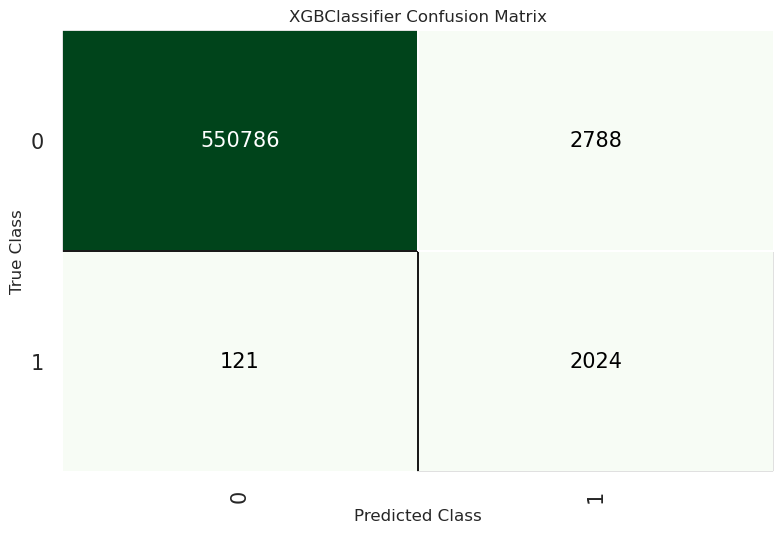

In [ ]:
XGBoost_os_model = create_model('xgboost')
XGBoost_os_model_predictions = predict_model(XGBoost_os_model)
plot_model(XGBoost_os_model, plot='confusion_matrix')

### **SMOTE**

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=27)

X = new_df.drop('is_fraud', axis=1)
y = new_df['is_fraud']

x_train, y_train = smote.fit_resample(X, y)

smote_df = pd.concat([pd.DataFrame(x_train, columns=X.columns), pd.Series(y_train, name='is_fraud')], axis=1)

smote_df["is_fraud"].value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [51]:
from pycaret.classification import *

s = setup(data=smote_df,
          target='is_fraud',
          index=False,
          #train_size=0.8,
          test_data = new_test,
          #max_encoding_ohe = 40,
          #feature_selection=True,
          #feature_selection_method="sequential",
          #feature_selection_estimator="catboost",
          #n_features_to_select=0.70,
          normalize=True,
          #normalize_method="zscore",
          normalize_method="minmax",
          transformation=True,
          transformation_method = 'yeo-johnson',
          fold=5,
          # session_id=99,
          #log_experiment=True,
          #experiment_name="comparer_all",
          use_gpu=True
          )

#### **All SMOTE Models**

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[I] [09:24:47.907841] Unused keyword parameter: n_jobs during cuML estimator initialization


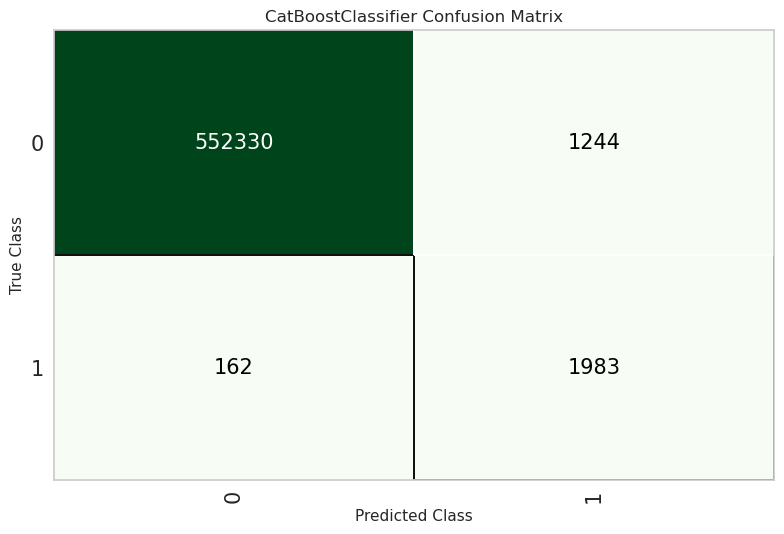

In [ ]:
best_smote = compare_models(sort='F1')
best_smote_predictions_test = predict_model(best_smote)
plot_model(best_smote, plot='confusion_matrix')

### **XGBoost + SMOTE**

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

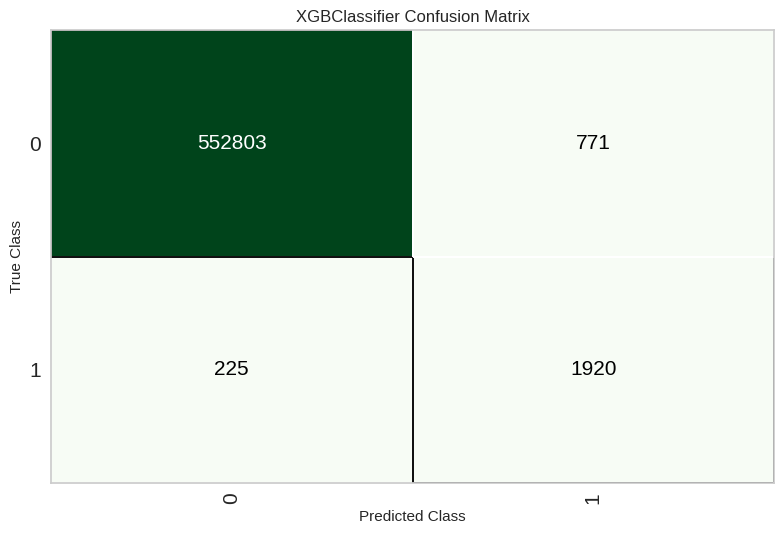

In [ ]:
xgboost_smote = create_model('xgboost')
xgboost_smote_predictions = predict_model(xgboost_smote)
plot_model(xgboost_smote, plot='confusion_matrix')

### **LightGBM + SMOTE**

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

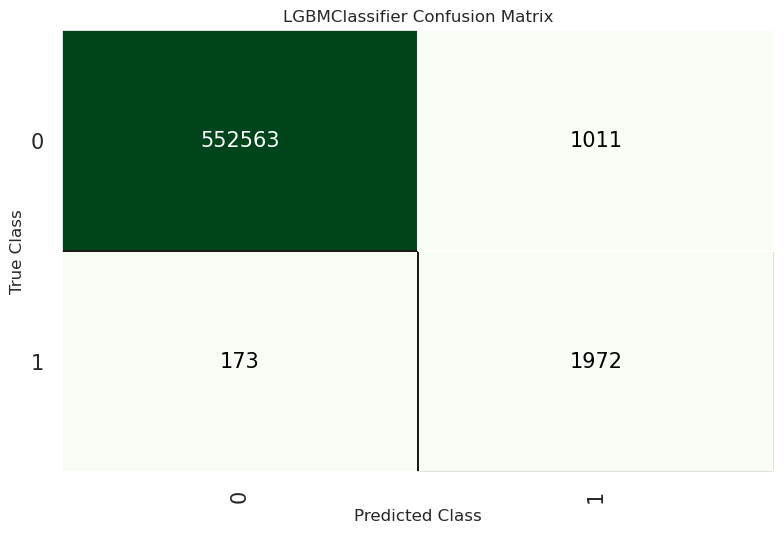

In [ ]:
lightgbm_smote = create_model('lightgbm')
lightgbm_smote_predictions = predict_model(lightgbm_smote)
plot_model(lightgbm_smote, plot='confusion_matrix')

## **The Model Selection**

From the all the models we created, the models used with SMOTE gave the best results, especially catboost and xgboost.

Now we are left with two choices, The choice of having less fraudulent
transactions using the catboost model, or less non fraudulent transactions using the xgboost model.

In our case, we chose the catboost model, for less fraudulent transactions. In the end it's a business decision, which means the choice is left for the company.

## **Model Tuning**

In [ ]:
# !pip install scikit-optimize

In [ ]:
catboost_grid = {
                 'iterations':[50,100,250,500,750,1000,1500,2000],
                 'learning_rate':[0.001,0.03,0.01,0.1],
                 'depth':[4,5,6,7,8,9,10],
                 'l2_leaf_reg':[2,3,5,7,10],
                 'random_strength':[0.05,0.1,1,3,5,7,10]
                 }

In [ ]:
tuned_catboost = tune_model(catboost, custom_grid=catboost_grid,search_library="scikit-optimize",
                            n_iter=10, tuner_verbose=10)

Initiated  . . . . . . . . . . . . . . . . . .                   16:25:18
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .  Extreme Gradient Boosting

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


## **Learning Curve**

### **ROC Curve**

In [ ]:
plot_model(catboost_model, plot="auc")

In [131]:
evaluate_model(catboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Feature Importance**

In [77]:
evaluate_model(catboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

We can notice that the column "amt" is the most important feature for the model. As for month, lat year and long, they don't have that big of an effect on the target variable, so we can remove these columns to reduce the complexity of the model, but we are going to keep them for better evaluation scores.

## **Finalize Model**

After choosing the best model, it's time to give that model all the available data, from training and testing sets, because the model is likely to perform better if trained on the whole set of available data than on the single subset used to estimate the model performance.

In [ ]:
final_catboost_model = finalize_model(catboost_model)

# **Model Interpretation**

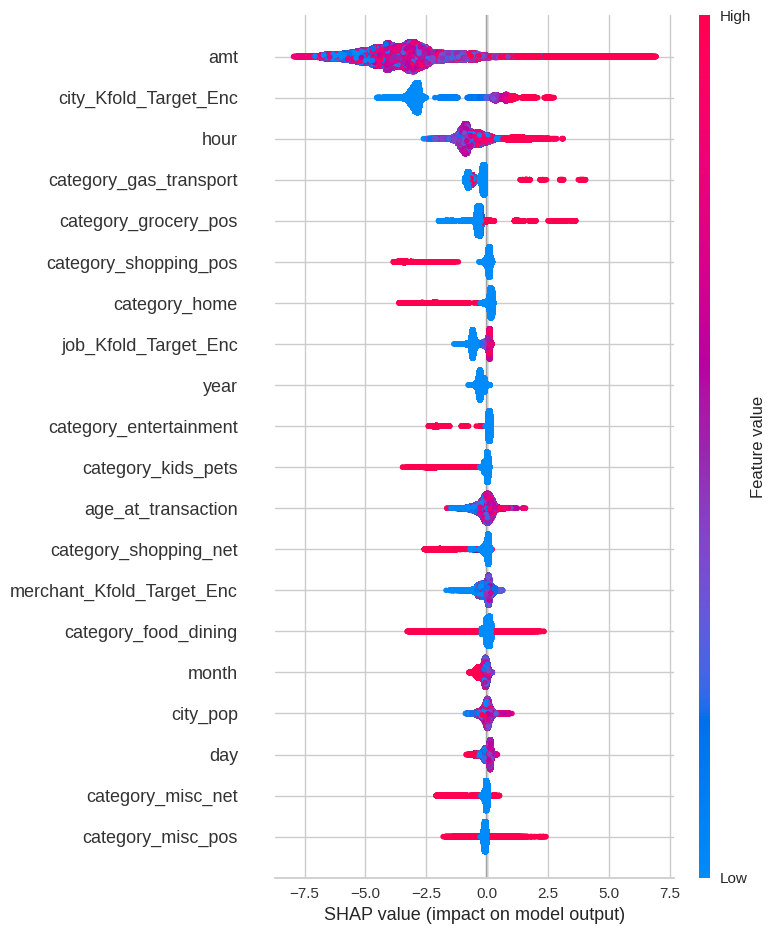

In [58]:
interpret_model(catboost_model)

# **Save the Model**

In [ ]:
import joblib

model_path = '/content/drive/MyDrive/mini_projet_DM/xgboost_smote.pkl'
joblib.dump(xgboost_smote, model_path)

['/content/drive/MyDrive/mini_projet_DM/xgboost_smote.pkl']

# **Load The model**

In [56]:
catboost_model = load_model('/content/drive/MyDrive/mini_projet_DM/catboost_smote')

Transformation Pipeline and Model Successfully Loaded


In [125]:
non_fraud_sample = {}

non_fraud_sample['amt'] = 116.460000
non_fraud_sample['lat'] = 36.055700
non_fraud_sample['long'] = -96.060200
non_fraud_sample['city_pop'] = 413574.000000
non_fraud_sample['hour'] = 3.000000
non_fraud_sample['age_at_transaction'] = 49.000000
non_fraud_sample['merchant_Kfold_Target_Enc'] = 0.001883
non_fraud_sample['city_Kfold_Target_Enc'] = 0.000000
non_fraud_sample['state_Kfold_Target_Enc'] = 0.004525
non_fraud_sample['job_Kfold_Target_Enc'] = 0.000000
non_fraud_sample['category_entertainment'] = 0.000000
non_fraud_sample['category_food_dining'] = 0.000000
non_fraud_sample['category_gas_transport'] = 0.000000
non_fraud_sample['category_grocery_net'] = 0.000000
non_fraud_sample['category_grocery_pos'] = 0.000000
non_fraud_sample['category_health_fitness'] = 0.000000
non_fraud_sample['category_home'] = 0.000000
non_fraud_sample['category_kids_pets'] = 0.000000
non_fraud_sample['category_misc_net'] = 0.000000
non_fraud_sample['category_misc_pos'] = 1.000000
non_fraud_sample['category_personal_care'] = 0.000000
non_fraud_sample['category_shopping_net'] = 0.000000
non_fraud_sample['category_shopping_pos'] = 0.000000
non_fraud_sample['category_travel'] = 0.000000
non_fraud_sample['year'] = 2020.000000
non_fraud_sample['month'] = 12.000000
non_fraud_sample['day'] = 21.000000

non_fraud_sample = pd.DataFrame([non_fraud_sample])

In [130]:
pred_f = predict_model(catboost_model, data=non_fraud_sample)
pred_f['prediction_label'][0]

0

In [127]:
fraud_sample = {}

fraud_sample['amt'] = 967.755627
fraud_sample['lat'] = 34.871041
fraud_sample['long'] = -80.289704
fraud_sample['city_pop'] = 2800.000000
fraud_sample['hour'] = 22.000000
fraud_sample['age_at_transaction'] = 57.000000
fraud_sample['merchant_Kfold_Target_Enc'] = 0.007040
fraud_sample['city_Kfold_Target_Enc'] = 0.979806
fraud_sample['state_Kfold_Target_Enc'] = 0.004777
fraud_sample['job_Kfold_Target_Enc'] = 0.005599
fraud_sample['category_entertainment'] = 0.000000
fraud_sample['category_food_dining'] = 0.000000
fraud_sample['category_gas_transport'] = 0.000000
fraud_sample['category_grocery_net'] = 0.000000
fraud_sample['category_grocery_pos'] = 0.000000
fraud_sample['category_health_fitness'] = 0.000000
fraud_sample['category_home'] = 0.000000
fraud_sample['category_kids_pets'] = 0.000000
fraud_sample['category_misc_net'] = 0.000000
fraud_sample['category_misc_pos'] = 0.000000
fraud_sample['category_personal_care'] = 0.000000
fraud_sample['category_shopping_net'] = 	1.000000
fraud_sample['category_shopping_pos'] = 0.000000
fraud_sample['category_travel'] = 0.000000
fraud_sample['year'] = 2019.000000
fraud_sample['month'] = 7.000000
fraud_sample['day'] = 12.000000

fraud_sample = pd.DataFrame([fraud_sample])

In [129]:
fraud_pred = predict_model(catboost_model, data=fraud_sample)
fraud_pred['prediction_label'][0]

1

In [62]:
evaluate_model(catboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:
interpret_model(catboost_model, plot='reason', X_new_sample=non_fraud_sample)

In [70]:
interpret_model(catboost_model, plot='reason', X_new_sample=fraud_sample)

# **Testing with the Web Application**

## **Non Fraud Sample**

In [156]:
test[test['is_fraud'] == 0].sample(random_state=42).T

547885
merchant            fraud_Medhurst, Cartwright and Ebert
category                                   personal_care
amt                                                60.51
city                                      Mulberry Grove
state                                                 IL
lat                                              38.9311
long                                            -89.2463
city_pop                                            1810
job                               Race relations officer
is_fraud                                               0
hour                                                  19
trans_date                           2020-12-29 00:00:00
age_at_transaction                                    46

## **Fraud Sample**

In [159]:
test[test['is_fraud'] == 1].sample().T

266753
merchant            fraud_Zieme, Bode and Dooley
category                           gas_transport
amt                                         8.45
city                                      Dallas
state                                         TX
lat                                      32.7699
long                                     -96.743
city_pop                                 1263321
job                   Television camera operator
is_fraud                                       1
hour                                           2
trans_date                   2020-09-28 00:00:00
age_at_transaction                            77